In [81]:
## Task: Prediciting LOS 
## We will use to predict the RMSE and also the short/long stay
#One common approach is to define a threshold value for LOS and classify stays as "short" or "long" based on whether their LOS is below or above a certain threshold. 


In [83]:
# Load Master dataset

In [1]:
import pandas as pd
import os
#from helpers import *
from sklearn.impute import SimpleImputer
from dataset_path import output_path,mimic_iv_path
path = output_path
#df_master = pd.read_csv(os.path.join(path, 'master_dataset_new.csv'))

ModuleNotFoundError: No module named 'dataset_path'

In [5]:
#df_master = pd.read_csv("C:/Users/user1/OneDrive - University of Cyprus/Desktop/Emergency_Department_Triage/Output/df_master_new.csv")

In [6]:
df_master['triage_acuity'].nunique()

5

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
pd.set_option('display.max_columns', 200) 
df_master.head()

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,98.4,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.7,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52,False,0 days 05:37:00,NaN,NaN,False,True,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,98.9,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,97.9,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0,6.80,1.0,3.33,1.0
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,97.8,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,98.2,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0,13.68,1.0,11.53,1.0
3,4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 08:06:00,2180-07-23 14:00:00,0 days 00:00:00,True,True,True,2,3,3,2180-08-05 20:58:00,13 days 06:58:00,False,1,2,2,0,0,0,8.10,0.0,13.29,98.7,77.0,16.0,98.0,96.0,50.0,13.0,2.0,"Abdominal distention, Abd pain, LETHAGIC",Fa

In [443]:
## Exploring data

Number of missing values in length of stay (hours): 0
Descriptive statistics of length of stay (hours):
count    425087.000000
mean          7.158324
std           6.627993
min         -22.730000
25%           3.530000
50%           5.470000
75%           8.320000
max         493.070000
Name: ed_los_hours, dtype: float64


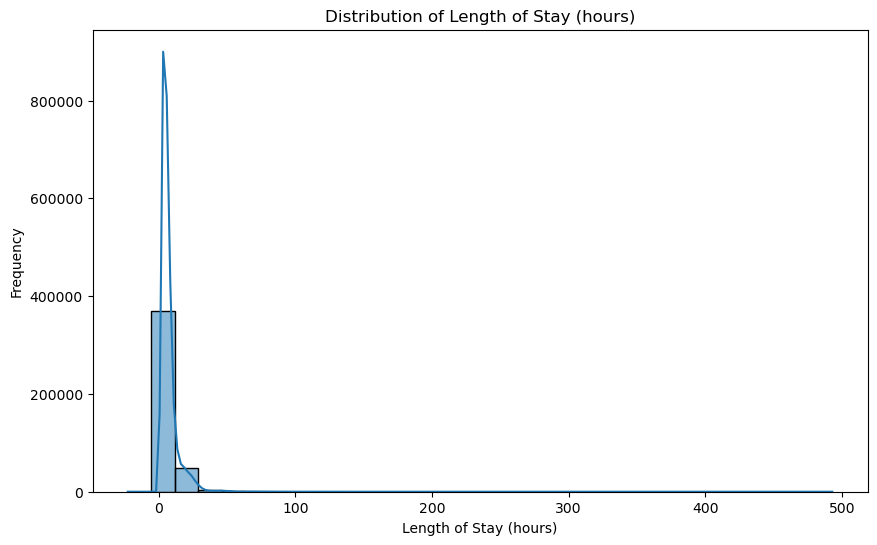

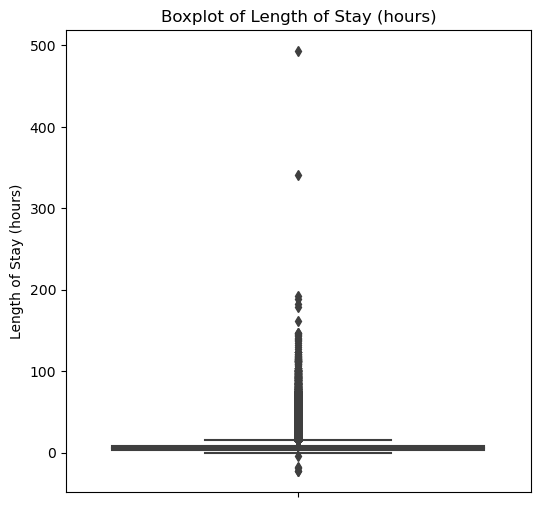

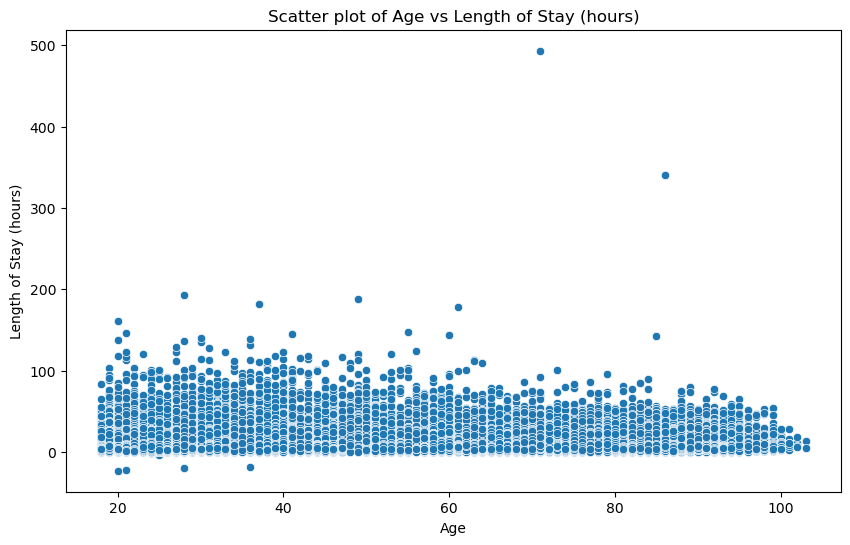

In [444]:
#Explpring LOS

# Check for missing values in the length of stay variable
missing_values = df_master['ed_los_hours'].isnull().sum()
print("Number of missing values in length of stay (hours):", missing_values)

# Describe the distribution of the length of stay variable
print("Descriptive statistics of length of stay (hours):")
print(df_master['ed_los_hours'].describe())

# Visualize the distribution of length of stay
plt.figure(figsize=(10, 6))
sns.histplot(df_master['ed_los_hours'], bins=30, kde=True)
plt.title('Distribution of Length of Stay (hours)')
plt.xlabel('Length of Stay (hours)')
plt.ylabel('Frequency')
plt.show()

# Check for outliers in the length of stay variable using boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_master['ed_los_hours'])
plt.title('Boxplot of Length of Stay (hours)')
plt.ylabel('Length of Stay (hours)')
plt.show()

# Explore relationships between different features and length of stay
# For example, you can use scatter plots or correlation analysis
# Here's a simple scatter plot between age and length of stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='ed_los_hours', data=df_master)
plt.title('Scatter plot of Age vs Length of Stay (hours)')
plt.xlabel('Age')
plt.ylabel('Length of Stay (hours)')
plt.show()


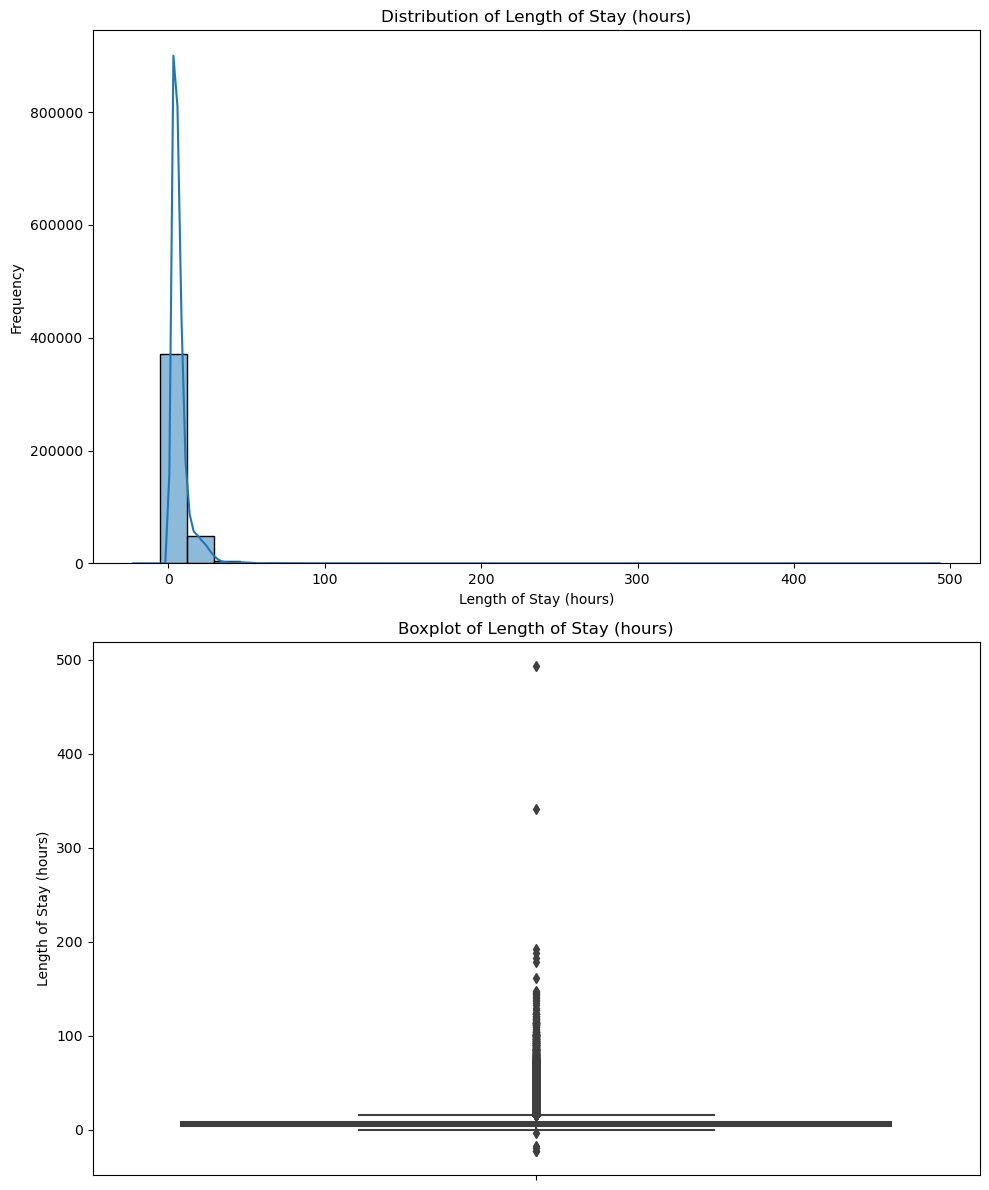

In [298]:
# Set up subplots for histogram and boxplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Visualize the distribution of length of stay (hours)
sns.histplot(df_master['ed_los_hours'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Length of Stay (hours)')
axs[0].set_xlabel('Length of Stay (hours)')
axs[0].set_ylabel('Frequency')

# Check for outliers in the length of stay variable using boxplot
sns.boxplot(y=df_master['ed_los_hours'], ax=axs[1])
axs[1].set_title('Boxplot of Length of Stay (hours)')
axs[1].set_ylabel('Length of Stay (hours)')

# Adjust layout
plt.tight_layout()
plt.show()

In [445]:
# Check for negative values in the length of stay variable
negative_values = (df_master['ed_los_hours'] < 0).sum()
print("Number of negative values in length of stay (hours):", negative_values)


Number of negative values in length of stay (hours): 6


In [449]:
# Remove records with negative values in los
df_master = df_master[df_master['ed_los_hours'] >= 0]

# Verify 
negative_values_after = (df_master['ed_los_hours'] < 0).sum()
print("Number of negative values in length of stay (hours) after removal:", negative_values_after)


Number of negative values in length of stay (hours) after removal: 0


In [452]:
#Checking for Outliers
# Calculate the interquartile range (IQR)
Q1 = df_master_filtered['ed_los_hours'].quantile(0.25)
Q3 = df_master_filtered['ed_los_hours'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_master_filtered[(df_master_filtered['ed_los_hours'] < lower_bound) | (df_master_filtered['ed_los_hours'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers in length of stay (hours):", num_outliers)


Number of outliers in length of stay (hours): 31160


In [407]:
# Calculate the 0.99 percentile value
percentile_99 = df_master['ed_los_hours'].quantile(0.99)

# Remove values greater than the 0.99 percentile
df_master_filtered = df_master[df_master['ed_los_hours'] <= percentile_99]

# Check the shape of the DataFrame before and after filtering
print("Shape of df_master before filtering:", df_master.shape)
print("Shape of df_master after filtering:", df_master_filtered.shape)


Shape of df_master before filtering: (425081, 124)
Shape of df_master after filtering: (420834, 124)


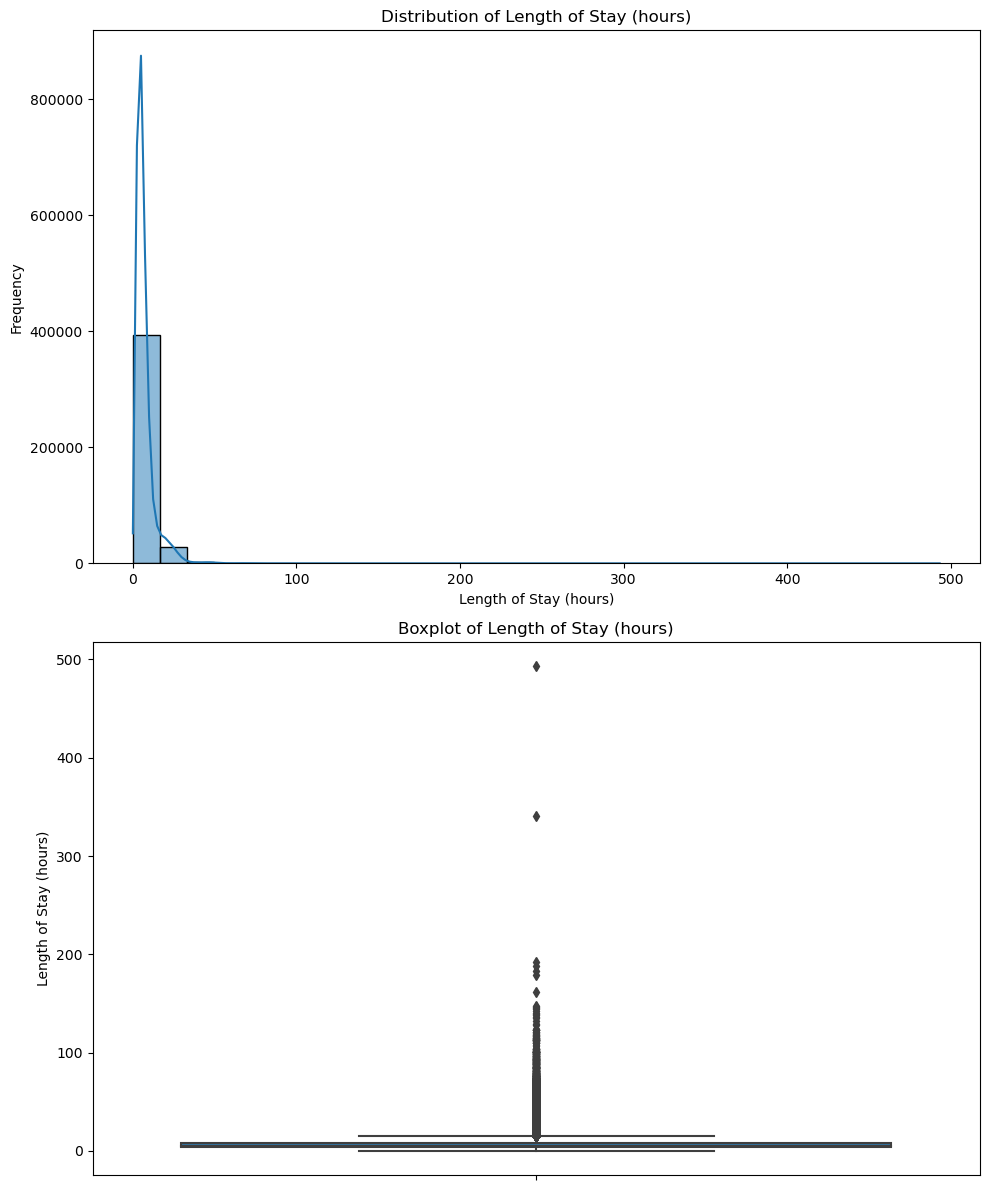

In [313]:
# Set up subplots for histogram and boxplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Visualize the distribution of length of stay (hours)
sns.histplot(df_master['ed_los_hours'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Length of Stay (hours)')
axs[0].set_xlabel('Length of Stay (hours)')
axs[0].set_ylabel('Frequency')

# Check for outliers in the length of stay variable using boxplot
sns.boxplot(y=df_master['ed_los_hours'], ax=axs[1])
axs[1].set_title('Boxplot of Length of Stay (hours)')
axs[1].set_ylabel('Length of Stay (hours)')

# Adjust layout
plt.tight_layout()
plt.show()

In [186]:
# Investigate individual outliers
#for index, row in outliers.iterrows():
 #   print("Outlier Record:", index)
  #  print("Length of Stay (hours):", row['ed_los_hours'])
    # Print additional information about the outlier record, such as other relevant features
    # You can explore other columns in the DataFrame to understand the context of the outlier
    # For example:
    # print("Subject ID:", row['subject_id'])
    # print("Chief Complaint:", row['chiefcomplaint'])
    # print("Other relevant information...")
   # print("\n")

In [414]:
import pandas as pd

def display_los_outliers_count(df_master, los_valid_range):
    display_df = pd.DataFrame(columns=['variable', '< outlier_low', '[outlier_low, valid_low)',
                                        '[valid_low, valid_high]', '(valid_high, outlier_high]', '> outlier_high'])
    
    for column in df_master.columns:
        if column in los_valid_range:
            column_range = los_valid_range[column]
            display_df.loc[len(display_df)] = {'variable': column,
                                                '< outlier_low': len(df_master[df_master[column] < column_range['outlier_low']]),
                                                '[outlier_low, valid_low)': len(df_master[(column_range['outlier_low'] <= df_master[column])
                                                                                              & (df_master[column] < column_range['valid_low'])]),
                                                '[valid_low, valid_high]': len(df_master[(column_range['valid_low'] <= df_master[column])
                                                                                         & (df_master[column] <= column_range['valid_high'])]),
                                                '(valid_high, outlier_high]': len(df_master[(column_range['valid_high'] < df_master[column])
                                                                                            & (df_master[column] <= column_range['outlier_high'])]),
                                                '> outlier_high': len(df_master[df_master[column] > column_range['outlier_high']])
                                               }
    return display_df


In [315]:
# 2. Quantiles
quantiles = df_master['ed_los_hours'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Quantiles:")
print(quantiles)

Quantiles:
0.25     3.53
0.50     5.47
0.75     8.32
0.90    13.55
0.95    19.88
0.99    30.48
Name: ed_los_hours, dtype: float64


In [377]:
# Calculate the 99th percentile
percentile_99 = df_master['ed_los_hours'].quantile(0.99)

# Filter the DataFrame for values over the 99th percentile
values_over_99_percentile = df_master[df_master['ed_los_hours'] > percentile_99]

# Count the number of values over the 99th percentile
count_over_99_percentile = len(values_over_99_percentile)

print("Number of values over the 99th percentile for ed_los_hours:", count_over_99_percentile)

Number of values over the 99th percentile for ed_los_hours: 4247


In [269]:
# Define valid range for length of stay (LOS) in hours
los_valid_range = {
    'ed_los_hours': {
        'outlier_low': 0,            # Lower bound for outliers
        'valid_low': 0.05,              # Lower bound for valid LOS
        'valid_high': 10,            # Upper bound for valid LOS (1 day)
        'outlier_high': 15          # Upper bound for outliers
        #'valid_high': 19.88,            # Upper bound for valid LOS (1 day)
        #'outlier_high': 30.48          # Upper bound for outliers
    }
}

# Call the function to display LOS outliers count
los_outliers_count_df = display_los_outliers_count(df_master, los_valid_range)

los_outliers_count_df


,variable,< outlier_low,"[outlier_low, valid_low)","[valid_low, valid_high]","(valid_high, outlier_high]",> outlier_high
0,ed_los_hours,0,119,352311,36502,36149


In [271]:
def impute_outliers(df_master, los_valid_range):
    #df_master = df_master.copy()  # Make a copy of the original DataFrame to avoid modifying it directly
    
    for column in df_master.columns:
        if column in los_valid_range:
            column_range = los_valid_range[column]
            
            # Set values to NaN if they are less than outlier_low or greater than outlier_high
            df_master[column] = np.where((df_master[column] < column_range['outlier_low']) | 
                                          (df_master[column] > column_range['outlier_high']),
                                          np.nan, df_master[column])
            
            # Impute values if they fall between valid_low and outlier_low or valid_high and outlier_high
            df_master[column] = np.where((df_master[column] > column_range['valid_low']) & 
                                          (df_master[column] < column_range['outlier_low']),
                                          column_range['valid_low'], df_master[column])
            
            df_master[column] = np.where((df_master[column] < column_range['valid_high']) & 
                                          (df_master[column] > column_range['outlier_high']),
                                          column_range['valid_high'], df_master[column])
            
    return df_master


In [273]:
df_master = impute_outliers(df_master, los_valid_range)

In [285]:
# Check for missing values in the LOS variable
missing_values = df_master['ed_los_hours'].isnull().sum()

print("Number of missing values in the Length of Stay (LOS) variable:", missing_values)


Number of missing values in the Length of Stay (LOS) variable: 36149


In [277]:
# 2. Quantiles
quantiles = df_master['ed_los_hours'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Quantiles:")
print(quantiles)

Quantiles:
0.25     3.37
0.50     5.12
0.75     7.38
0.90     9.85
0.95    11.53
0.99    14.08
Name: ed_los_hours, dtype: float64


In [289]:
# Count the occurrences of values less than or equal to 6 and those greater than 6
los_counts = df_master['ed_los_hours'].apply(lambda x: 'less than or equal to 6' if x <= 6 else 'greater than 6').value_counts()

# Display the counts
print(los_counts)


ed_los_hours
less than or equal to 6    238512
greater than 6             186569
Name: count, dtype: int64


In [287]:
# Define the threshold for LOS classification
threshold = 6  # Define your threshold value here (in hours)

# Create a new binary variable indicating short or long stays
df_master['LOS_category'] = df_master['ed_los_hours'].apply(lambda x: 'short' if x <= threshold else 'long')

# Optionally, encode the binary variable as 0s and 1s
#df_master['LOS_category_encoded'] = df_master['LOS_category'].map({'short': 0, 'long': 1})

# Display the counts of each category
print(df_master['LOS_category'].value_counts())


LOS_category
short    238512
long     186569
Name: count, dtype: int64


In [283]:
186569+238512

425081

In [20]:
#Vitals

In [457]:
def convert_temp_to_celcius(df_master):
    for column in df_master.columns:
        column_type = column.split('_')[1] if len(column.split('_')) > 1 else None
        if column_type == 'temperature':
            # convert to Celsius
            df_master.loc[:, column] -= 32
            df_master.loc[:, column] *= 5/9
    return df_master

In [459]:
df_master = convert_temp_to_celcius(df_master)

In [461]:
df_master

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52,False,0 days 05:37:00,NaN,NaN,False,True,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,37.166667,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0,6.80,1.0,3.33,1.0
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0,13.68,1.0,11.53,1.0
3,4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 08:06:00,2180-07-23 14:00:00,0 days 00:00:00,True,True,True,2,3,3,2180-08-05 20:58:00,13 days 06:58:00,False,1,2,2,0,0,0,8.10,0.0,13.29,37.055556,77.0,16.0,98.0,96.0,50.0,13.0,2.0,"Abdominal

In [463]:
# from mimic-extract
vitals_valid_range = {
    'temperature': {'outlier_low': 14.2, 'valid_low': 26, 'valid_high': 45, 'outlier_high':47},
    'heartrate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 350, 'outlier_high':390},
    'resprate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 300, 'outlier_high':330},
    'o2sat': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 100, 'outlier_high':150},
    'sbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'dbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'pain': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 10, 'outlier_high':10},
    'acuity': {'outlier_low': 1, 'valid_low': 1, 'valid_high': 5, 'outlier_high':5},
}

In [465]:
def display_outliers_count_new(df_master, vitals_valid_range):
    display_list = []

    for column in df_master.columns:
        column_type = column.split('_')[1] if len(column.split('_')) > 1 else None
        if column_type in vitals_valid_range:
            column_range = vitals_valid_range[column_type]
            display_list.append({
                'variable': column,
                '< outlier_low': len(df_master[df_master[column] < column_range['outlier_low']]),
                '[outlier_low, valid_low)': len(df_master[(column_range['outlier_low'] <= df_master[column])
                                                          & (df_master[column] < column_range['valid_low'])]),
                '[valid_low, valid_high]': len(df_master[(column_range['valid_low'] <= df_master[column])
                                                         & (df_master[column] <= column_range['valid_high'])]),
                '(valid_high, outlier_high]': len(df_master[(column_range['valid_high'] < df_master[column])
                                                            & (df_master[column] <= column_range['outlier_high'])]),
                '> outlier_high': len(df_master[df_master[column] > column_range['outlier_high']])
            })

    # Create a DataFrame from the list of dictionaries
    display_df = pd.DataFrame(display_list)
    return display_df


In [467]:
display_outliers_count_new(df_master, vitals_valid_range)

,variable,< outlier_low,"[outlier_low, valid_low)","[valid_low, valid_high]","(valid_high, outlier_high]",> outlier_high
0,triage_temperature,479,29,401149,0,9
1,triage_heartrate,0,0,407984,0,7
2,triage_resprate,0,0,404725,0,3
3,triage_o2sat,0,0,404438,6,41
4,triage_sbp,0,0,406774,0,16
5,triage_dbp,0,0,405595,0,395
6,triage_pain,0,0,386846,0,11205
7,triage_acuity,0,0,418094,0,0
8,ed_temperature_last,751,43,398200,1,48
9,ed_heartrate_last,0,0,406643,0,0


In [483]:
cat = df_master['triage_acuity'].isna().sum()
print(cat)

6987


In [433]:
df_master = remove_outliers(df_master, vitals_valid_range)

In [28]:
# Get columns related to vitals and ed_los_hours
vitals_cols = [col for col in df_master.columns 
               if len(col.split('_')) > 1 and 
               (col.split('_')[1] in vitals_valid_range or col == 'ed_los_hours') 
               #col.split('_')[1] != 'acuity']
              ]
# Display the selected columns
vitals_cols

['ed_los_hours',
 'triage_temperature',
 'triage_heartrate',
 'triage_resprate',
 'triage_o2sat',
 'triage_sbp',
 'triage_dbp',
 'triage_pain',
 'triage_acuity',
 'ed_temperature_last',
 'ed_heartrate_last',
 'ed_resprate_last',
 'ed_o2sat_last',
 'ed_sbp_last',
 'ed_dbp_last',
 'ed_pain_last']

In [162]:
vitals_cols = [col for col in df_master.columns if len(col.split('_')) > 1 and 
                                                   col.split('_')[1] in vitals_valid_range and
                                                   col.split('_')[1] != 'acuity']
vitals_cols

['triage_temperature',
 'triage_heartrate',
 'triage_resprate',
 'triage_o2sat',
 'triage_sbp',
 'triage_dbp',
 'triage_pain',
 'ed_temperature_last',
 'ed_heartrate_last',
 'ed_resprate_last',
 'ed_o2sat_last',
 'ed_sbp_last',
 'ed_dbp_last',
 'ed_pain_last']

In [437]:
df_master['triage_acuity'].isna().sum()

6987

In [29]:
df_missing_stats = df_master.isnull().sum().to_frame().T
df_missing_stats.loc[1] = df_missing_stats.loc[0] / len(df_master)
df_missing_stats.index = ['no. of missing values', 'percentage of missing values']
df_missing_stats

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event
no. of missing values,0.0,0.0,222065.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361597.000000,222065.000000,222065.000000,420481.000000,134948.000000,222065.000000,222065.000000,222065.000000,0.0,0.0,0.0,0.0,393160.000000,393160.000000,0.0,0.0,0.0,0.0,0.0,0.0,205502.000000,205502.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36149.00000,393160.000000,205502.000000,23903.000000,17097.000000,20356.000000,20637.000000,18307.000000,19486.000000,38235.000000,6987.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26837.000000,18438.000000,18923.000000,29102.000000,18678.00000,18936.000000,49649.000000,0.0,0.0,348633.000000,0.0,263325.00000,0.0
percentage of missing values,0.0,0.0,0.522406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.850654,0.522406,0.522406,0.989179,0.317464,0.522406,0.522406,0.522406,0.0,0.0,0.0,0.0,0.924906,0.924906,0.0,0.0,0.0,0.0,0.0,0.0,0.483442,0.483442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08504,0.924906,0.483442,0.056232,0.040221,0.047887,0.048548,0.043067,0.045841,0.089948,0.016437,0.000054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063134,0.043375,0.044516,0.068462,0.04394,0.044547,0.116799,0.0,0.0,0.820157,0.0,0.61947,0.0


In [164]:
imputer = SimpleImputer(strategy='median')
df_master[vitals_cols] = imputer.fit_transform(df_master[vitals_cols])

In [367]:
##Missing value imputation 
#now we do the missing value imputation

In [190]:
##KNN

In [58]:
# Create new DataFrame with selected variables and outcome
df_knn = df_master[vitals_cols].copy()

# Display the first few rows of the new DataFrame
df_knn.head()


,ed_los_hours,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last
0,4.22,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0
1,5.62,37.166667,88.0,18.0,97.0,116.0,88.0,10.0,3.0,36.611111,86.0,17.0,93.0,96.0,57.0,5.0
2,13.50,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,36.777778,85.0,18.0,98.0,81.0,38.0,0.0
3,8.10,37.055556,77.0,16.0,98.0,96.0,50.0,NaN,2.0,37.222222,96.0,18.0,97.0,86.0,45.0,NaN
4,4.77,37.444444,105.0,18.0,96.0,106.0,57.0,10.0,3.0,36.722222,91.0,18.0,99.0,98.0,60.0,NaN


In [60]:
df_knn.to_csv(os.path.join(path, 'df_knn.csv'), index=False)

In [1043]:
from sklearn.impute import KNNImputer

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_knn_imputed = imputer.fit_transform(df_knn)

# Convert the result back to a DataFrame
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=df_knn.columns)

# Display the imputed DataFrame
df_knn_imputed.head()


,ed_los_hours,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last
0,4.22,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0
1,5.62,37.166667,88.0,18.0,97.0,116.0,88.0,10.0,3.0,36.611111,86.0,17.0,93.0,96.0,57.0,5.0
2,13.50,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,36.777778,85.0,18.0,98.0,81.0,38.0,0.0
3,8.10,37.055556,77.0,16.0,98.0,96.0,50.0,2.6,2.0,37.222222,96.0,18.0,97.0,86.0,45.0,1.6
4,4.77,37.444444,105.0,18.0,96.0,106.0,57.0,10.0,3.0,36.722222,91.0,18.0,99.0,98.0,60.0,6.8


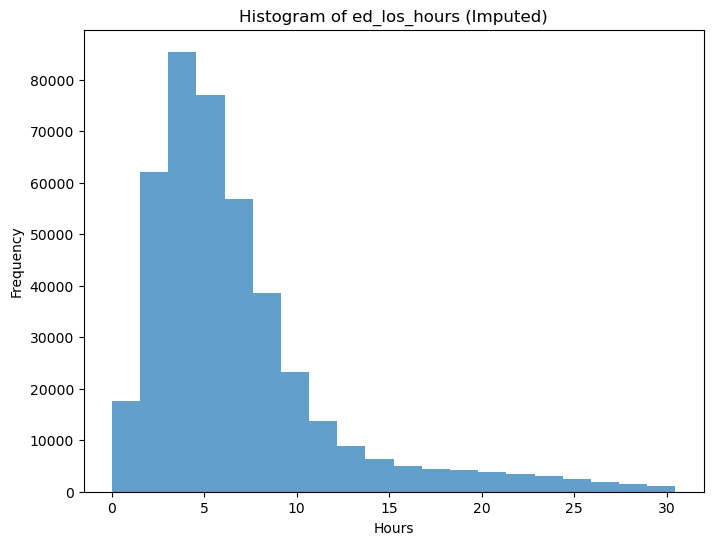

In [364]:
import matplotlib.pyplot as plt

# Create figure and axes for the histogram
fig, ax_hist = plt.subplots(figsize=(8, 6))

# Histogram
ax_hist.hist(df_master_filtered['ed_los_hours'], bins=20, alpha=0.7)
ax_hist.set_title('Histogram of ed_los_hours (Imputed)')
ax_hist.set_xlabel('Hours')
ax_hist.set_ylabel('Frequency')

# Show histogram
plt.show()

In [68]:
df_missing_stats = df_master.isnull().sum().to_frame().T
df_missing_stats.loc[1] = df_missing_stats.loc[0] / len(df_master)
df_missing_stats.index = ['no. of missing values', 'percentage of missing values']
df_missing_stats

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event
no. of missing values,0.0,0.0,222065.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361597.000000,222065.000000,222065.000000,420481.000000,134948.000000,222065.000000,222065.000000,222065.000000,0.0,0.0,0.0,0.0,393160.000000,393160.000000,0.0,0.0,0.0,0.0,0.0,0.0,205502.000000,205502.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36149.00000,393160.000000,205502.000000,23903.000000,17097.000000,20356.000000,20637.000000,18307.000000,19486.000000,38235.000000,6987.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26837.000000,18438.000000,18923.000000,29102.000000,18678.00000,18936.000000,49649.000000,0.0,0.0,348633.000000,0.0,263325.00000,0.0
percentage of missing values,0.0,0.0,0.522406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.850654,0.522406,0.522406,0.989179,0.317464,0.522406,0.522406,0.522406,0.0,0.0,0.0,0.0,0.924906,0.924906,0.0,0.0,0.0,0.0,0.0,0.0,0.483442,0.483442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08504,0.924906,0.483442,0.056232,0.040221,0.047887,0.048548,0.043067,0.045841,0.089948,0.016437,0.000054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063134,0.043375,0.044516,0.068462,0.04394,0.044547,0.116799,0.0,0.0,0.820157,0.0,0.61947,0.0


In [195]:
df_master

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median,gender_encoded,race_encoded,arrival_transport_encoded,disposition_encoded,insurance_encoded,cci_score,eci_score,ed_los_hours_knn
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0,4.22,3.0,0,28,0,0,2,0,0,4.22
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52,False,0 days 05:37:00,NaN,NaN,False,True,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,37.166667,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0,6.80,1.0,3.33,1.0,5.62,3.0,0,28,0,0,0,5,5,5.62
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0,13.68,1.0,11.53,1.0,13.50,2.0,0,28,0,3,0,5,8,13.50
3,4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 08:06:00,2180-07-23 14:00:00,0 days 00:00:00,True,

In [ ]:
#Median

In [70]:
from sklearn.impute import SimpleImputer

def impute_missing_median_ed_los_hours(df):
    # Extract the 'ed_los_hours' column
    ed_los_hours = df_master['ed_los_hours'].values.reshape(-1, 1)  # Reshape to a 2D array for SimpleImputer

    # Initialize the SimpleImputer with strategy='median'
    imputer = SimpleImputer(strategy='median')

    # Impute missing values for 'ed_los_hours'
    ed_los_hours_imputed = imputer.fit_transform(ed_los_hours)

    # Replace the 'ed_los_hours' column with the imputed values
    #df_master = df.copy()
    df_master['ed_los_hours_median'] = ed_los_hours_imputed

    return df_master


In [72]:
df_master = impute_missing_median_ed_los_hours(df_master)

In [170]:
from sklearn.impute import SimpleImputer


# Extract the 'ed_los_hours' column
triage_acuity = df_master['triage_acuity'].values.reshape(-1, 1)  # Reshape to a 2D array for SimpleImputer

# Initialize the SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Impute missing values for 'ed_los_hours'
triage_acuity_imputed = imputer.fit_transform(triage_acuity)

# Replace the 'ed_los_hours' column with the imputed values
#df_master = df.copy()
df_master['triage_acuity_median'] = triage_acuity_imputed

#return df_master


In [76]:
df_master

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0,4.22,3.0
1,1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52,False,0 days 05:37:00,NaN,NaN,False,True,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,37.166667,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.611111,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0,6.80,1.0,3.33,1.0,5.62,3.0
2,3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0,13.68,1.0,11.53,1.0,13.50,2.0
3,4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 08:06:00,2180-07-23 14:00:00,0 days 00:00:00,True,True,True,2,3,3,2180-08-05 20:58:00,13 days 06:58:00,False,1,2,2,0,0,0,

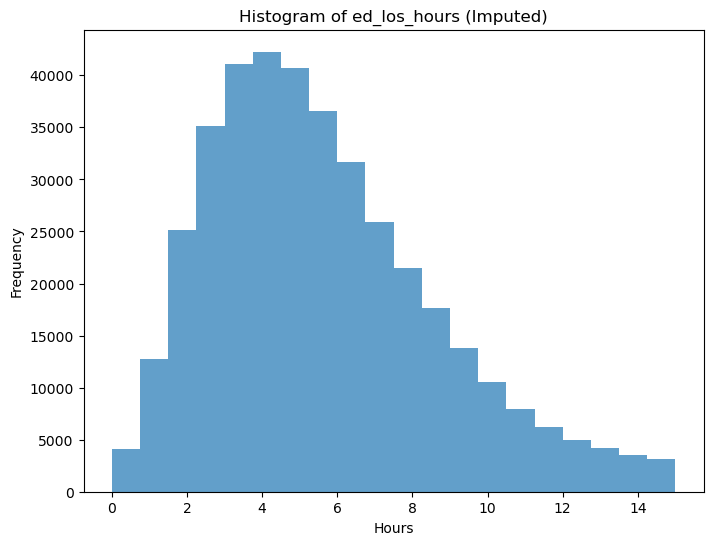

In [166]:
import matplotlib.pyplot as plt

# Create figure and axes for the histogram
fig, ax_hist = plt.subplots(figsize=(8, 6))

# Histogram
ax_hist.hist(df_master['ed_los_hours'], bins=20, alpha=0.7)
ax_hist.set_title('Histogram of ed_los_hours (Imputed)')
ax_hist.set_xlabel('Hours')
ax_hist.set_ylabel('Frequency')

# Show histogram
plt.show()



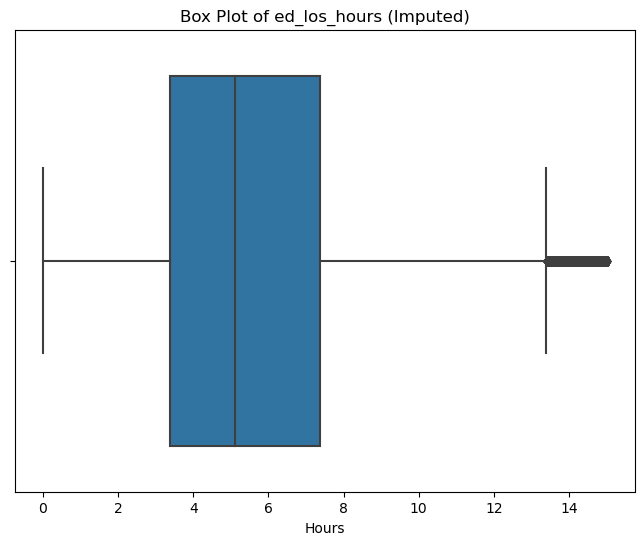

In [80]:
# Create box plot for ed_los_hours
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_master['ed_los_hours'], orient='h')
plt.title('Box Plot of ed_los_hours (Imputed)')
plt.xlabel('Hours')
plt.show()

In [487]:
#Encoding Variables 


In [ ]:
#Binary Encoding 

In [82]:
#df_master

In [84]:
#Gender

# Encode 'gender' variable as 0 for female and 1 for male
df_master['gender_encoded'] = df_master['gender'].map({'F': 0, 'M': 1})

In [86]:
print(df_master['gender_encoded'].value_counts())

gender_encoded
0    229894
1    195187
Name: count, dtype: int64


In [88]:
#Race
# Display the unique categories and their counts for the 'race' variable
print(df_master['race'].value_counts())

# Get the number of unique categories in the 'race' variable
num_categories = df_master['race'].nunique()
print("Number of unique categories in 'race' variable:", num_categories)



race
WHITE                                        228119
BLACK/AFRICAN AMERICAN                        76797
OTHER                                         20751
HISPANIC/LATINO - PUERTO RICAN                14036
WHITE - OTHER EUROPEAN                         8992
HISPANIC/LATINO - DOMINICAN                    8330
BLACK/CAPE VERDEAN                             7638
ASIAN - CHINESE                                7348
ASIAN                                          7294
UNKNOWN                                        7083
WHITE - RUSSIAN                                6091
BLACK/AFRICAN                                  4887
BLACK/CARIBBEAN ISLAND                         3675
HISPANIC OR LATINO                             3141
HISPANIC/LATINO - GUATEMALAN                   2356
ASIAN - ASIAN INDIAN                           1567
ASIAN - SOUTH EAST ASIAN                       1533
HISPANIC/LATINO - SALVADORAN                   1497
WHITE - BRAZILIAN                              1484
PORTUGU

In [90]:
# Mapping for manual encoding
race_mapping = {
    'WHITE': 0,
    'BLACK/AFRICAN AMERICAN': 1,
    'OTHER': 2,
    'HISPANIC/LATINO - PUERTO RICAN': 3,
    'WHITE - OTHER EUROPEAN': 4,
    'HISPANIC/LATINO - DOMINICAN': 5,
    'BLACK/CAPE VERDEAN': 6,
    'ASIAN - CHINESE': 7,
    'ASIAN': 8,
    'UNKNOWN': 9,
    'WHITE - RUSSIAN': 10,
    'BLACK/AFRICAN': 11,
    'BLACK/CARIBBEAN ISLAND': 12,
    'HISPANIC OR LATINO': 13,
    'HISPANIC/LATINO - GUATEMALAN': 14,
    'ASIAN - ASIAN INDIAN': 15,
    'ASIAN - SOUTH EAST ASIAN': 16,
    'HISPANIC/LATINO - SALVADORAN': 17,
    'WHITE - BRAZILIAN': 18,
    'PORTUGUESE': 19,
    'WHITE - EASTERN EUROPEAN': 20,
    'HISPANIC/LATINO - COLUMBIAN': 21,
    'HISPANIC/LATINO - MEXICAN': 22,
    'SOUTH AMERICAN': 23,
    'AMERICAN INDIAN/ALASKA NATIVE': 24,
    'HISPANIC/LATINO - HONDURAN': 25,
    'HISPANIC/LATINO - CUBAN': 26,
    'HISPANIC/LATINO - CENTRAL AMERICAN': 27,
    'ASIAN - KOREAN': 28,
    'PATIENT DECLINED TO ANSWER': 29,
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 30,
    'MULTIPLE RACE/ETHNICITY': 31,
    'UNABLE TO OBTAIN': 32
}

# Encode 'race' variable using the mapping
df_master['race_encoded'] = df_master['race'].map(race_mapping)


In [92]:
# Display the first few rows of the DataFrame with encoded 'race' variable
print(df_master[['race', 'race_encoded']].tail())

                          race  race_encoded
425082  BLACK/AFRICAN AMERICAN             1
425083                   WHITE             0
425084                   WHITE             0
425085                 UNKNOWN             9
425086                 UNKNOWN             9


In [94]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'race' variable
df_master['race_encoded'] = label_encoder.fit_transform(df_master['race'])

# Display the first few rows of the DataFrame with encoded 'race' variable
print(df_master[['race', 'race_encoded']].tail())


                          race  race_encoded
425082  BLACK/AFRICAN AMERICAN             7
425083                   WHITE            28
425084                   WHITE            28
425085                 UNKNOWN            27
425086                 UNKNOWN            27


In [95]:
#Transport

# Get the number of unique categories in the 'race' variable
num_categories = df_master['arrival_transport'].nunique()
print("Number of unique categories in 'arrival_transport' variable:", num_categories)


Number of unique categories in 'arrival_transport' variable: 5


In [98]:
print(df_master['arrival_transport'].value_counts())

arrival_transport
WALK IN       251846
AMBULANCE     155750
UNKNOWN        15351
OTHER           1266
HELICOPTER       868
Name: count, dtype: int64


In [100]:
# Define the mapping dictionary
arrival_transport_mapping = {
    'WALK IN': 0,
    'AMBULANCE': 1,
    'UNKNOWN': 2,
    'OTHER': 3,
    'HELICOPTER': 4
}

# Apply the mapping to encode the variable
df_master['arrival_transport_encoded'] = df_master['arrival_transport'].map(arrival_transport_mapping)


In [102]:
print(df_master[['arrival_transport', 'arrival_transport_encoded']].tail())


       arrival_transport  arrival_transport_encoded
425082           WALK IN                          0
425083           WALK IN                          0
425084         AMBULANCE                          1
425085           UNKNOWN                          2
425086         AMBULANCE                          1


In [104]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'arrival_transport' variable
df_master['arrival_transport_encoded'] = label_encoder.fit_transform(df_master['arrival_transport'])

# Display the first few rows of the DataFrame with encoded 'arrival_transport' variable
print(df_master[['arrival_transport', 'arrival_transport_encoded']].tail())


       arrival_transport  arrival_transport_encoded
425082           WALK IN                          4
425083           WALK IN                          4
425084         AMBULANCE                          0
425085           UNKNOWN                          3
425086         AMBULANCE                          0


In [105]:
#
print(df_master['disposition'].value_counts())

# Get the number of unique categories in the 'race' variable
num_categories = df_master['disposition'].nunique()
print("Number of unique categories in 'disposition' variable:", num_categories)

disposition
HOME                           241627
ADMITTED                       158010
TRANSFER                         7025
LEFT WITHOUT BEING SEEN          6154
ELOPED                           5710
OTHER                            4297
LEFT AGAINST MEDICAL ADVICE      1881
EXPIRED                           377
Name: count, dtype: int64
Number of unique categories in 'disposition' variable: 8


In [108]:
#disposition
# Get the number of unique categories in the 'race' variable
num_categories = df_master['disposition'].nunique()
print("Number of unique categories in 'disposition' variable:", num_categories)


Number of unique categories in 'disposition' variable: 8


In [110]:
# Define the mapping dictionary
disposition_mapping = {
    'HOME': 0,
    'ADMITTED': 1,
    'TRANSFER': 2,
    'LEFT WITHOUT BEING SEEN': 3,
    'ELOPED': 4,
    'OTHER': 5,
    'LEFT AGAINST MEDICAL ADVICE': 6,
    'EXPIRED': 7
}

# Apply the mapping to encode the variable
df_master['disposition_encoded'] = df_master['disposition'].map(disposition_mapping)


In [112]:
# Display the first few rows of the DataFrame with encoded 'disposition' variable
print(df_master[['disposition', 'disposition_encoded']].tail())

       disposition  disposition_encoded
425082    ADMITTED                    1
425083    ADMITTED                    1
425084    ADMITTED                    1
425085      ELOPED                    4
425086    ADMITTED                    1


In [114]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'disposition' variable
df_master['disposition_encoded'] = label_encoder.fit_transform(df_master['disposition'])

# Display the first few rows of the DataFrame with encoded 'disposition' variable
print(df_master[['disposition', 'disposition_encoded']].tail())


       disposition  disposition_encoded
425082    ADMITTED                    0
425083    ADMITTED                    0
425084    ADMITTED                    0
425085      ELOPED                    1
425086    ADMITTED                    0


In [115]:
#ethnicity variable same as race (needs to be dropped)


In [116]:
df_master['insurance'].isna().sum()

222065

In [120]:
# Replace missing values in 'insurance' column with 'Unknown'
df_master['insurance'].fillna('Unknown/NotInsured', inplace=True)

In [122]:
#insurance
#
# Display the unique categories and their counts for the 'race' variable
print(df_master['insurance'].value_counts())

# Get the number of unique categories in the 'race' variable
num_categories = df_master['insurance'].nunique()
print("Number of unique categories in 'insurance' variable:", num_categories)


insurance
Unknown/NotInsured    222065
Other                 106059
Medicare               78964
Medicaid               17993
Name: count, dtype: int64
Number of unique categories in 'insurance' variable: 4


In [124]:
insurance_mapping = {
    'Unknown/NotInsured': 0,
    'Other': 1,
    'Medicare': 2,
    'Medicaid': 3
}

df_master['insurance_encoded'] = df_master['insurance'].map(insurance_mapping)


In [126]:
# Display the first few rows of the DataFrame with encoded 'insurance' variable
print(df_master[['insurance', 'insurance_encoded']].head())


  insurance  insurance_encoded
0     Other                  1
1  Medicaid                  3
2  Medicaid                  3
3  Medicaid                  3
4  Medicaid                  3


In [128]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'insurance' variable
df_master['insurance_encoded'] = label_encoder.fit_transform(df_master['insurance'])

# Display the first few rows of the DataFrame with encoded 'insurance' variable
print(df_master[['insurance', 'insurance_encoded']].head())


  insurance  insurance_encoded
0     Other                  2
1  Medicaid                  0
2  Medicaid                  0
3  Medicaid                  0
4  Medicaid                  0


In [130]:
#Chief Complaint

# Convert True/False columns to binary (0 or 1)
binary_columns = ['chiefcom_chest_pain', 'chiefcom_abdominal_pain', 'chiefcom_headache', 
                  'chiefcom_shortness_of_breath', 'chiefcom_back_pain', 'chiefcom_cough', 
                  'chiefcom_nausea_vomiting', 'chiefcom_fever_chills', 'chiefcom_syncope', 
                  'chiefcom_dizziness']

for column in binary_columns:
    df_master[column] = df_master[column].astype(int)

# Display the first few rows to verify the encoding
print(df_master[binary_columns].head())


   chiefcom_chest_pain  chiefcom_abdominal_pain  chiefcom_headache  \
0                    0                        1                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        1                  0   
4                    0                        1                  0   

   chiefcom_shortness_of_breath  chiefcom_back_pain  chiefcom_cough  \
0                             0                   0               0   
1                             0                   0               0   
2                             0                   0               0   
3                             0                   0               0   
4                             0                   0               0   

   chiefcom_nausea_vomiting  chiefcom_fever_chills  chiefcom_syncope  \
0                         0                      0                 0   
1       

In [132]:
#One-hot-Encoding 

In [134]:
# Create dummy variables for all categorical variables without dropping any category
race_dummies = pd.get_dummies(df_master['race'], prefix='race', drop_first=False)
arrival_transport_dummies = pd.get_dummies(df_master['arrival_transport'], prefix='arrival_transport', drop_first=False)
disposition_dummies = pd.get_dummies(df_master['disposition'], prefix='disposition', drop_first=False)
insurance_dummies = pd.get_dummies(df_master['insurance'], prefix='insurance', drop_first=False)


In [136]:
# Concatenate the dummy variables with the original DataFrame
df_master = pd.concat([df_master, race_dummies, arrival_transport_dummies, disposition_dummies, insurance_dummies  ], axis=1)
df_master


,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median,gender_encoded,race_encoded,arrival_transport_encoded,disposition_encoded,insurance_encoded,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,race_HISPANIC OR LATINO,race_HISPANIC/LATINO - CENTRAL AMERICAN,race_HISPANIC/LATINO - COLUMBIAN,race_HISPANIC/LATINO - CUBAN,race_HISPANIC/LATINO - DOMINICAN,race_HISPANIC/LATINO - GUATEMALAN,race_HISPANIC/LATINO - HONDURAN,race_HISPANIC/LATINO - MEXICAN,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_MULTIPLE RACE/ETHNICITY,race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK IN,disposition_ADMITTED,disposition_ELOPED,disposition_EXPIRED,disposition_HOME,disposition_LEFT AGAINST MEDICAL ADVICE,disposition_LEFT WITHOUT BEING SEEN,disposition_OTHER,disposition_TRANSFER,insurance_Medicaid,insurance_Medicare,insurance_Other,insurance_Unknown/NotInsured
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0,4.22,3.0,0,28,0,0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1,10000032,22841357.0,3

In [137]:
# One-hot encode 'race'
df_race = pd.get_dummies(df_master['race'], prefix='race')
df_race

,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,race_HISPANIC OR LATINO,race_HISPANIC/LATINO - CENTRAL AMERICAN,race_HISPANIC/LATINO - COLUMBIAN,race_HISPANIC/LATINO - CUBAN,race_HISPANIC/LATINO - DOMINICAN,race_HISPANIC/LATINO - GUATEMALAN,race_HISPANIC/LATINO - HONDURAN,race_HISPANIC/LATINO - MEXICAN,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_MULTIPLE RACE/ETHNICITY,race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425082,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
425083,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
425084,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
425085,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [140]:
# One-hot encode 'disposition'
df_disposition = pd.get_dummies(df_master['disposition'], prefix='disposition')
df_disposition

,disposition_ADMITTED,disposition_ELOPED,disposition_EXPIRED,disposition_HOME,disposition_LEFT AGAINST MEDICAL ADVICE,disposition_LEFT WITHOUT BEING SEEN,disposition_OTHER,disposition_TRANSFER
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
425082,True,False,False,False,False,False,False,False
425083,True,False,False,False,False,False,False,False
425084,True,False,False,False,False,False,False,False
425085,False,True,False,False,False,False,False,False


In [142]:
# One-hot encode 'arrival_transport'
df_arrival_transport = pd.get_dummies(df_master['arrival_transport'], prefix='arrival_transport')
df_arrival_transport

,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK IN
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
425082,False,False,False,False,True
425083,False,False,False,False,True
425084,True,False,False,False,False
425085,False,False,False,True,False


In [144]:
# One-hot encode 'arrival_transport'
df_insurance = pd.get_dummies(df_master['insurance'], prefix='insurance')
df_insurance

,insurance_Medicaid,insurance_Medicare,insurance_Other,insurance_Unknown/NotInsured
0,False,False,True,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
425082,False,False,True,False
425083,False,False,True,False
425084,False,False,True,False
425085,False,False,False,True


In [148]:
#df_master

In [151]:
#Feature Engineering 

In [153]:
#Charlson's Comorbidity Index (CCI)

def calculate_cci(row):
    cci_weights = {
        'MI': 1,
        'CHF': 1,
        'PVD': 1,
        'Stroke': 1,
        'Dementia': 1,
        'Pulmonary': 1,
        'Rheumatic': 1,
        'PUD': 1,
        'Liver1': 1,
        'DM1': 1,
        'DM2': 2,
        'Paralysis': 2,
        'Renal': 2,
        'Cancer1': 2,
        'Liver2': 3,
        'Cancer2': 6,
        'HIV': 6
    }
    
    cci_score = 0
    for condition, weight in cci_weights.items():
        if row[f'cci_{condition}']:
            cci_score += weight
    return cci_score

# Apply the function to calculate CCI for each row (ED stay)
df_master['cci_score'] = df_master.apply(calculate_cci, axis=1)


In [154]:
# Define the weights for each ECI condition
eci_weights = {
    'Arrhythmia': 1,
    'Valvular': 3,
    'PHTN': 2,
    'PVD': 2,
    'HTN1': 1,
    'HTN2': 2,
    'Paralysis': 2,
    'NeuroOther': 1,
    'Pulmonary': 1,
    'DM1': 1,
    'DM2': 1,
    'Hypothyroid': 1,
    'Renal': 2,
    'Liver': 3,
    'PUD': 1,
    'HIV': 6,
    'Lymphoma': 2,
    'Tumor2': 2,
    'Tumor1': 1,
    'Rheumatic': 1,
    'Coagulopathy': 2,
    'Obesity': 1,
    'WeightLoss': 1,
    'FluidsLytes': 1,
    'BloodLoss': 1,
    'Anemia': 1,
    'Alcohol': 1,
    'Drugs': 1,
    'Psychoses': 3,
    'Depression': 1
}

# Define a function to calculate the ECI score for each row
def calculate_eci(row):
    eci_score = 0
    for condition, weight in eci_weights.items():
        if row[f'eci_{condition}']:
            eci_score += weight
    return eci_score

# 
# Apply the calculate_eci function row-wise to calculate ECI score for each patient
df_master['eci_score'] = df_master.apply(calculate_eci, axis=1)

# Now df_master contains a new column 'eci_score' representing the ECI score for each visit


In [155]:
df_master

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median,gender_encoded,race_encoded,arrival_transport_encoded,disposition_encoded,insurance_encoded,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,race_HISPANIC OR LATINO,race_HISPANIC/LATINO - CENTRAL AMERICAN,race_HISPANIC/LATINO - COLUMBIAN,race_HISPANIC/LATINO - CUBAN,race_HISPANIC/LATINO - DOMINICAN,race_HISPANIC/LATINO - GUATEMALAN,race_HISPANIC/LATINO - HONDURAN,race_HISPANIC/LATINO - MEXICAN,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_MULTIPLE RACE/ETHNICITY,race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK IN,disposition_ADMITTED,disposition_ELOPED,disposition_EXPIRED,disposition_HOME,disposition_LEFT AGAINST MEDICAL ADVICE,disposition_LEFT WITHOUT BEING SEEN,disposition_OTHER,disposition_TRANSFER,insurance_Medicaid,insurance_Medicare,insurance_Other,insurance_Unknown/NotInsured,cci_score,eci_score
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0,4.22,3.0,0,28,0,0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,0,0
1

In [172]:
df_missing_stats = df_master.isnull().sum().to_frame().T
df_missing_stats.loc[1] = df_missing_stats.loc[0] / len(df_master)
df_missing_stats.index = ['no. of missing values', 'percentage of missing values']
df_missing_stats

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median,gender_encoded,race_encoded,arrival_transport_encoded,disposition_encoded,insurance_encoded,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,race_HISPANIC OR LATINO,race_HISPANIC/LATINO - CENTRAL AMERICAN,race_HISPANIC/LATINO - COLUMBIAN,race_HISPANIC/LATINO - CUBAN,race_HISPANIC/LATINO - DOMINICAN,race_HISPANIC/LATINO - GUATEMALAN,race_HISPANIC/LATINO - HONDURAN,race_HISPANIC/LATINO - MEXICAN,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_MULTIPLE RACE/ETHNICITY,race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK IN,disposition_ADMITTED,disposition_ELOPED,disposition_EXPIRED,disposition_HOME,disposition_LEFT AGAINST MEDICAL ADVICE,disposition_LEFT WITHOUT BEING SEEN,disposition_OTHER,disposition_TRANSFER,insurance_Medicaid,insurance_Medicare,insurance_Other,insurance_Unknown/NotInsured,cci_score,eci_score
no. of missing values,0.0,0.0,222065.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361597.000000,222065.000000,222065.000000,420481.000000,134948.000000,222065.000000,222065.000000,0.0,0.0,0.0,0.0,0.0,393160.000000,393160.000000,0.0,0.0,0.0,0.0,0.0,0.0,205502.000000,205502.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36149.00000,393160.000000,205502.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6987.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348633.000000,0.0,263325.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [174]:
df_master.to_csv(os.path.join(path, 'df_master_knn_1.csv'), index=False)


In [264]:
#Split the data 

In [682]:
df_train= df_master.sample(frac=0.8,random_state=10) #set seed
df_test= df_master.drop(df_train.index)

In [683]:
print('Training dataset size = ', len(df_train))
print('Testing dataset size = ', len(df_test))

Training dataset size =  340065
Testing dataset size =  85016


In [113]:
df_missing_stats = df_train.isnull().sum().to_frame().T
df_missing_stats.loc[1] = df_missing_stats.loc[0] / len(df_train)
df_missing_stats.index = ['no. of missing values', 'percentage of missing values']
df_missing_stats

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median,gender_encoded,race_encoded,arrival_transport_encoded,disposition_encoded,insurance_encoded,cci_score,eci_score
no. of missing values,0.0,0.0,177715.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289226.000000,177715.000000,177715.000000,336317.000000,108146.000000,177715.000000,177715.000000,177715.000000,0.0,0.0,0.0,0.0,314497.000000,314497.000000,0.0,0.0,0.0,0.0,0.0,0.0,164275.000000,164275.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28926.00000,314497.000000,164275.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5644.000000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279033.000000,0.0,210649.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percentage of missing values,0.0,0.0,0.522591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.850502,0.522591,0.522591,0.988979,0.318016,0.522591,0.522591,0.522591,0.0,0.0,0.0,0.0,0.924814,0.924814,0.0,0.0,0.0,0.0,0.0,0.0,0.483069,0.483069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08506,0.924814,0.483069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016597,0.000059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820528,0.0,0.619437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## ML

In [440]:
#df_master

In [511]:
variable = ["age", "gender_encoded","race_encoded","arrival_transport_encoded","disposition_encoded",
            "insurance_encoded","cci_score","eci_score",
            
            "n_ed_30d", "n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", "n_icu_90d", "n_icu_365d", 
            
            "triage_temperature", "triage_heartrate", "triage_resprate", 
            "triage_o2sat", "triage_sbp", "triage_dbp", "triage_pain", "triage_acuity",
            
            #"ed_temperature_last","ed_heartrate_last","ed_resprate_last","ed_o2sat_last",
            #"ed_sbp_last","ed_dbp_last","ed_pain_last"
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache",
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope", 
            "chiefcom_dizziness", 
            
            "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", 
            "cci_Pulmonary", "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", 
            "cci_DM2", "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", 
            "cci_Cancer2", "cci_HIV", 
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2", 
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss",
            "eci_Anemia", "eci_Alcohol", "eci_Drugs","eci_Psychoses", "eci_Depression",
            "med_event"
           ]

outcome = "ed_los_hours"

In [490]:
#df_train["ed_los_hours"].isnull().sum()

In [446]:
# Check for missing values in each variable
#for var in variable:
 #   missing_values = df_master[var].isnull().sum()
  #  print(f"Number of missing values in {var}: {missing_values}")


In [ ]:
## Random Forest

In [513]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#
X_train = df_train[variable]
y_train = df_train[outcome]

X_test = df_test[variable]
y_test = df_test[outcome]

# Step 3: Train the Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Example hyperparameters
rf_model.fit(X_train, y_train)

# Step 4: Predict on Test Data
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
#before rmse 2.54

Mean Absolute Error (MAE): 1.9914927300953047
Mean Squared Error (MSE): 6.467788135204965
Root Mean Squared Error (RMSE): 2.543184644339645


In [304]:
#pd.set_option('display.max_rows', 100) 


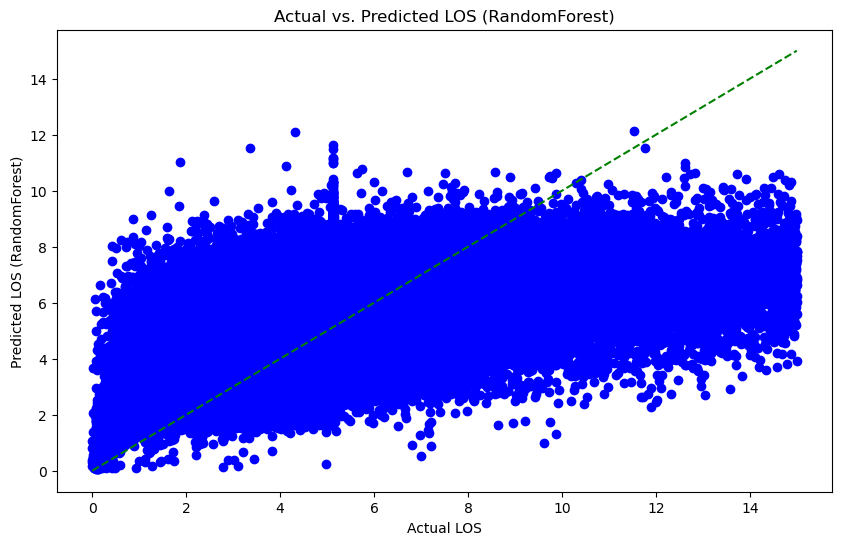

In [515]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted LOS for RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS (RandomForest)')
plt.title('Actual vs. Predicted LOS (RandomForest)')
plt.show()


In [532]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df


,Feature,Importance
5,insurance_encoded,0.095251
0,age,0.088039
21,triage_sbp,0.084500
18,triage_heartrate,0.083537
22,triage_dbp,0.079723
17,triage_temperature,0.073237
24,triage_acuity,0.047896
3,arrival_transport_encoded,0.038462
23,triage_pain,0.036773
2,race_encoded,0.035588


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


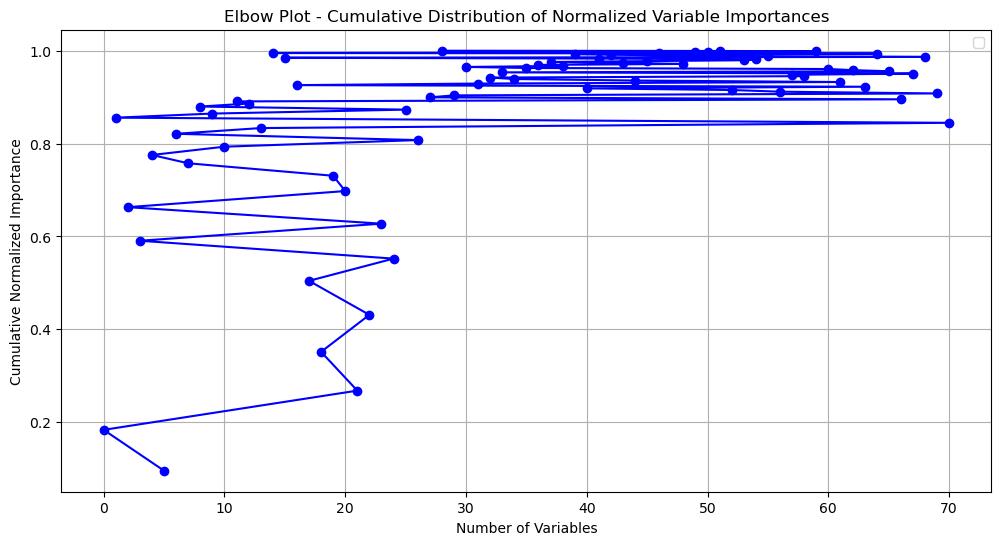

In [534]:
#visualize importances to reduce variables, only include ones with highest importance

# Normalize the importances
importance_df['Normalized_Importance'] = importance_df['Importance'] / importance_df['Importance'].sum()

# Calculate cumulative sum of normalized importances
importance_df['Cumulative_Normalized_Importance'] = importance_df['Normalized_Importance'].cumsum()

# Plot the elbow plot
plt.figure(figsize=(12, 6))
plt.plot(importance_df.index, importance_df['Cumulative_Normalized_Importance'], marker='o', linestyle='-', color='b')
plt.title('Elbow Plot - Cumulative Distribution of Normalized Variable Importances')
plt.xlabel('Number of Variables')
plt.ylabel('Cumulative Normalized Importance')
plt.grid(True)

#Mark the 14th variable point
#variable_14_x = 13  # index is 0-based
#variable_14_y = importance_df['Cumulative_Normalized_Importance'].iloc[13]

# Add dotted lines
#plt.axvline(x=variable_14_x, color='gray', linestyle='--', linewidth=0.9, alpha=0.9)
#plt.axhline(y=variable_14_y, color='gray', linestyle='--', linewidth=0.9, alpha=0.9)

# Create a marker at the 14th variable point
#plt.scatter(variable_14_x, variable_14_y, color='red', zorder=5,label='14th Variable')  #line
# Add legend
plt.legend()
plt.show()

In [ ]:
## Gradient Boosting 

In [523]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 3: Train the Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Example hyperparameters
gb_model.fit(X_train, y_train)

# Step 4: Predict on Test Data
y_pred_gb = gb_model.predict(X_test)

# Step 5: Evaluate Model Performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

print("Gradient Boosting - Mean Absolute Error (MAE):", mae_gb)
print("Gradient Boosting - Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting - Root Mean Squared Error (RMSE):", rmse_gb)
#before 2.53

Gradient Boosting - Mean Absolute Error (MAE): 1.9828355990684106
Gradient Boosting - Mean Squared Error (MSE): 6.4291556407414845
Gradient Boosting - Root Mean Squared Error (RMSE): 2.5355779697618224


In [525]:
# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df


,Feature,Importance
5,insurance_encoded,0.384369
24,triage_acuity,0.166182
3,arrival_transport_encoded,0.101312
4,disposition_encoded,0.089162
26,chiefcom_abdominal_pain,0.062813
7,eci_score,0.045074
70,med_event,0.038546
0,age,0.020731
23,triage_pain,0.019106
25,chiefcom_chest_pain,0.013903


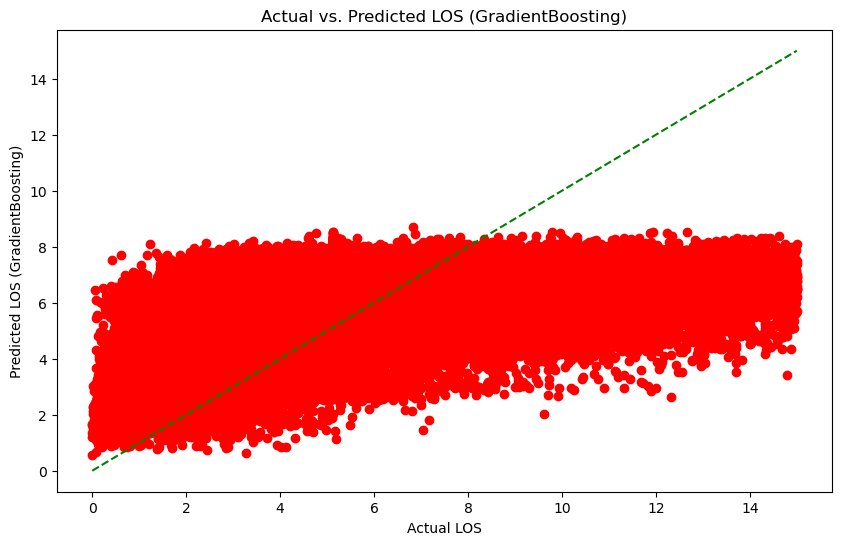

In [500]:
# Plot actual vs. predicted LOS for GradientBoostingRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS (GradientBoosting)')
plt.title('Actual vs. Predicted LOS (GradientBoosting)')
plt.show()

In [ ]:
## Classification Task 

In [ ]:
#define a threshold value for LOS and classify stays as "short" or "long" based on whether their LOS is below or above a certain threshold.

In [ ]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8608640/
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8608640/#B2
#In general, the accepted duration of a patient in ED—emergency department length of stay (EDLOS)—is 6 hours.
# The National Health System of the UK, however, pegs this at 4 hours.

In [697]:
# Define the threshold for LOS classification
threshold = 6  # Define your threshold value here (in hours)

# Create a new binary variable indicating short or long stays
df_master['LOS_category'] = df_master['ed_los_hours'].apply(lambda x: 'short' if x <= threshold else 'long')

# Optionally, encode the binary variable as 0s and 1s
df_master['LOS_category_encoded'] = df_master['LOS_category'].map({'short': 0, 'long': 1})

# Display the counts of each category
print(df_master['LOS_category'].value_counts())


LOS_category
short    238512
long     186569
Name: count, dtype: int64


In [757]:
df_train= df_master.sample(frac=0.8,random_state=10) #set seed
df_test= df_master.drop(df_train.index)

In [269]:
#df_master

## Classification Task

In [ ]:
#Random Forest 

In [897]:
df_master

,index,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,time_to_microbio_event_hrs,microbiology_event,time_to_med_event_hr,med_event,ed_los_hours_median,triage_acuity_median,gender_encoded,race_encoded,arrival_transport_encoded,disposition_encoded,insurance_encoded,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,race_HISPANIC OR LATINO,race_HISPANIC/LATINO - CENTRAL AMERICAN,race_HISPANIC/LATINO - COLUMBIAN,race_HISPANIC/LATINO - CUBAN,race_HISPANIC/LATINO - DOMINICAN,race_HISPANIC/LATINO - GUATEMALAN,race_HISPANIC/LATINO - HONDURAN,race_HISPANIC/LATINO - MEXICAN,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_MULTIPLE RACE/ETHNICITY,race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_UNKNOWN,arrival_transport_WALK IN,disposition_ADMITTED,disposition_ELOPED,disposition_EXPIRED,disposition_HOME,disposition_LEFT AGAINST MEDICAL ADVICE,disposition_LEFT WITHOUT BEING SEEN,disposition_OTHER,disposition_TRANSFER,insurance_Medicaid,insurance_Medicare,insurance_Other,insurance_Unknown/NotInsured,cci_score,eci_score,LOS_category,LOS_category_encoded
0,0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,52,2180,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52,False,0 days 04:13:00,NaN,NaN,False,True,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,36.888889,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.500000,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0,10.92,1.0,2.37,1.0,4.22,3.0,0,0,1,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,False,False,0,False,1,False,False,0,False,False,False,0,False,False,T

In [899]:
variable = ["age", "gender_encoded","cci_score","eci_score",
            
            "n_ed_30d", "n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", "n_icu_90d", "n_icu_365d", 
            
            "triage_temperature", "triage_heartrate", "triage_resprate", 
            "triage_o2sat", "triage_sbp", "triage_dbp", "triage_pain", "triage_acuity_median",
            
            #"ed_temperature_last","ed_heartrate_last","ed_resprate_last","ed_o2sat_last",
            #"ed_sbp_last","ed_dbp_last","ed_pain_last"
            
    'race_AMERICAN INDIAN/ALASKA NATIVE','race_ASIAN','race_ASIAN - ASIAN INDIAN','race_ASIAN - CHINESE',
    'race_ASIAN - KOREAN','race_ASIAN - SOUTH EAST ASIAN','race_BLACK/AFRICAN','race_BLACK/AFRICAN AMERICAN',
    'race_BLACK/CAPE VERDEAN','race_BLACK/CARIBBEAN ISLAND',
    'race_HISPANIC OR LATINO','race_HISPANIC/LATINO - CENTRAL AMERICAN','race_HISPANIC/LATINO - COLUMBIAN',
    'race_HISPANIC/LATINO - CUBAN','race_HISPANIC/LATINO - DOMINICAN','race_HISPANIC/LATINO - GUATEMALAN',
    'race_HISPANIC/LATINO - HONDURAN','race_HISPANIC/LATINO - MEXICAN','race_HISPANIC/LATINO - PUERTO RICAN',
    'race_HISPANIC/LATINO - SALVADORAN','race_MULTIPLE RACE/ETHNICITY','race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
    'race_OTHER','race_PATIENT DECLINED TO ANSWER','race_PORTUGUESE',
    'race_SOUTH AMERICAN','race_UNABLE TO OBTAIN','race_UNKNOWN','race_WHITE','race_WHITE - BRAZILIAN',
    'race_WHITE - EASTERN EUROPEAN','race_WHITE - OTHER EUROPEAN','race_WHITE - RUSSIAN',
    'arrival_transport_AMBULANCE','arrival_transport_HELICOPTER','arrival_transport_OTHER','arrival_transport_UNKNOWN',
    'arrival_transport_WALK IN',
    'disposition_ADMITTED','disposition_ELOPED','disposition_EXPIRED',
    'disposition_HOME','disposition_LEFT AGAINST MEDICAL ADVICE','disposition_LEFT WITHOUT BEING SEEN','disposition_OTHER',
    'disposition_TRANSFER',
    #'insurance_Medicaid','insurance_Medicare','insurance_Other','insurance_Unknown/NotInsured',


            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache",
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope", 
            "chiefcom_dizziness", 
            
            "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", 
            "cci_Pulmonary", "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", 
            "cci_DM2", "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", 
            "cci_Cancer2", "cci_HIV", 
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2", 
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss",
            "eci_Anemia", "eci_Alcohol", "eci_Drugs","eci_Psychoses", "eci_Depression",
            "med_event",'microbiology_event'
           ]

outcome = "LOS_category_encoded"

In [901]:
#
X_train = df_train[variable]
y_train = df_train[outcome]

X_test = df_test[variable]
y_test = df_test[outcome]

In [903]:
#with dummies (+microbio)
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Step 4: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Evaluate Classifier
y_pred = rf_classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate F1 Score
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

Accuracy: 0.6736261409617014
AUC Score: 0.7387738217262969
Specificity: 0.7181547992800034
Sensitivity: 0.616493904076481
F1 Score:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71     47778
           1       0.63      0.62      0.62     37238

    accuracy                           0.67     85016
   macro avg       0.67      0.67      0.67     85016
weighted avg       0.67      0.67      0.67     85016



In [905]:
#With dummies (no insurance)
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
0,age,0.089541
17,triage_sbp,0.079627
14,triage_heartrate,0.078727
18,triage_dbp,0.076929
13,triage_temperature,0.072397
19,triage_pain,0.044354
20,triage_acuity_median,0.040915
15,triage_resprate,0.038332
16,triage_o2sat,0.037295
3,eci_score,0.024895


In [763]:
#with dummies (no insurance)
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Step 4: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Evaluate Classifier
y_pred = rf_classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate F1 Score
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

Accuracy: 0.6728262915215959
AUC Score: 0.7384441940172521
Specificity: 0.7156222529197539
Sensitivity: 0.6179171813738654
F1 Score:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71     47778
           1       0.63      0.62      0.62     37238

    accuracy                           0.67     85016
   macro avg       0.67      0.67      0.67     85016
weighted avg       0.67      0.67      0.67     85016



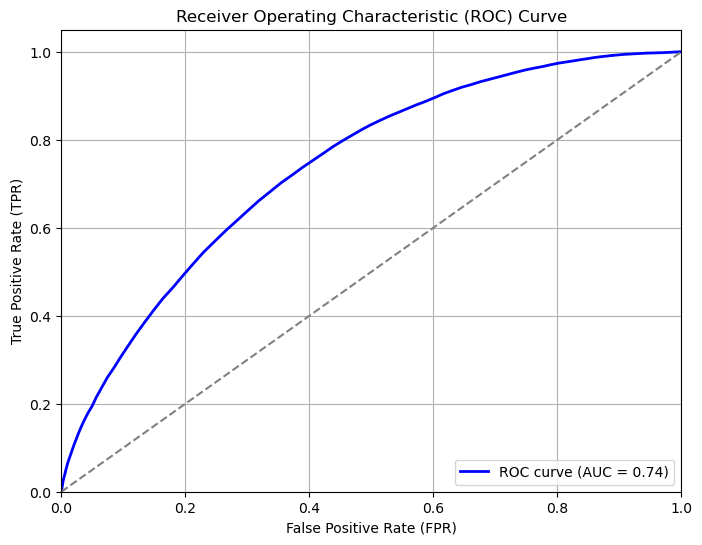

In [764]:
#with dummies(no insurance)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
variable = [ 'age','triage_sbp','triage_heartrate','triage_dbp','triage_temperature','triage_pain'
             '','','','',
]

In [767]:
#With dummies (no insurance)
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
0,age,0.089630
17,triage_sbp,0.080602
14,triage_heartrate,0.079459
18,triage_dbp,0.077774
13,triage_temperature,0.073361
19,triage_pain,0.044292
20,triage_acuity_median,0.042271
15,triage_resprate,0.038741
16,triage_o2sat,0.037241
3,eci_score,0.025876


In [731]:
#with dummies
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Step 4: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Evaluate Classifier
y_pred = rf_classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate F1 Score
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

Accuracy: 0.7129599134280606
AUC Score: 0.7906854191775045
Specificity: 0.7744777931265436
Sensitivity: 0.6340297545518019
F1 Score:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75     47778
           1       0.69      0.63      0.66     37238

    accuracy                           0.71     85016
   macro avg       0.71      0.70      0.71     85016
weighted avg       0.71      0.71      0.71     85016



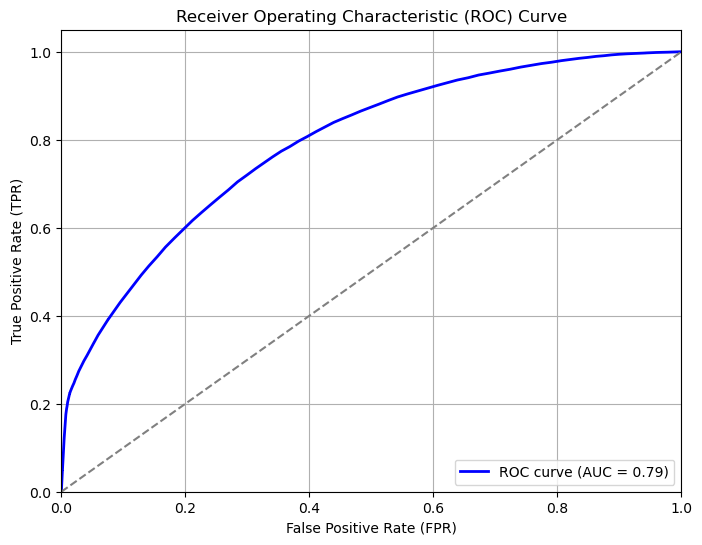

In [732]:
#with dummies
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [737]:
#With dummies
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
n = 10  # Number of top features to display
importance_df

,Feature,Importance
0,age,0.078087
17,triage_sbp,0.070084
14,triage_heartrate,0.068966
18,triage_dbp,0.067563
13,triage_temperature,0.063751
70,insurance_Unknown/NotInsured,0.058710
19,triage_pain,0.038839
16,triage_o2sat,0.033935
15,triage_resprate,0.033784
20,triage_acuity_median,0.032078


In [717]:
pd.set_option('display.max_rows', 200) 


In [239]:
#without dummies
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Step 4: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Evaluate Classifier
y_pred = rf_classifier.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate F1 Score
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

Accuracy: 0.7119718641196952
AUC Score: 0.7880556565603105
Specificity: 0.7666080622880824
Sensitivity: 0.641871206831731
F1 Score:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75     47778
           1       0.68      0.64      0.66     37238

    accuracy                           0.71     85016
   macro avg       0.71      0.70      0.71     85016
weighted avg       0.71      0.71      0.71     85016



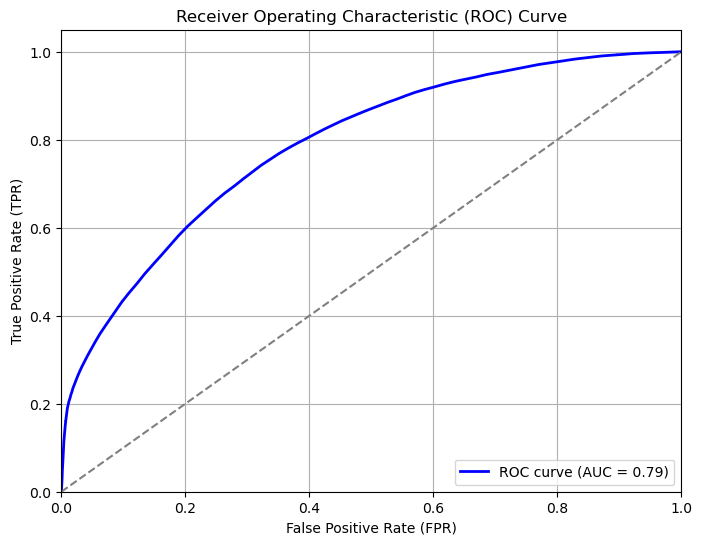

In [247]:
#withoutdummies
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [334]:
#Without dummies
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
5,insurance_encoded,0.093124
0,age,0.082889
21,triage_sbp,0.075965
18,triage_heartrate,0.074240
22,triage_dbp,0.072560
17,triage_temperature,0.068394
4,disposition_encoded,0.044040
23,triage_pain,0.040399
24,triage_acuity_median,0.037619
2,race_encoded,0.036439


In [706]:
#df_master

In [ ]:
##Gradient Boosting 

In [907]:
#with dummies (microbio event)
from sklearn.ensemble import GradientBoostingClassifier

#Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

#Evaluate Classifier
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6676978451115084
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71     47778
           1       0.63      0.60      0.61     37238

    accuracy                           0.67     85016
   macro avg       0.66      0.66      0.66     85016
weighted avg       0.67      0.67      0.67     85016

Confusion Matrix:
 [[34539 13239]
 [15012 22226]]


In [908]:
#with dummies (microbio event)
# Calculate AUC Score
auc_score = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

AUC Score: 0.735010604155935


In [909]:
#with dummies (microbio event)
# Get feature importances
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
20,triage_acuity_median,0.267140
59,disposition_ADMITTED,0.121872
3,eci_score,0.092703
57,arrival_transport_UNKNOWN,0.075460
54,arrival_transport_AMBULANCE,0.073470
68,chiefcom_abdominal_pain,0.063101
0,age,0.054768
66,disposition_TRANSFER,0.040851
67,chiefcom_chest_pain,0.032632
62,disposition_HOME,0.028131


In [769]:
#with dummies (no insurance)
from sklearn.ensemble import GradientBoostingClassifier

#Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

#Evaluate Classifier
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.666850945704338
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71     47778
           1       0.63      0.59      0.61     37238

    accuracy                           0.67     85016
   macro avg       0.66      0.66      0.66     85016
weighted avg       0.67      0.67      0.67     85016

Confusion Matrix:
 [[34734 13044]
 [15279 21959]]


In [770]:
#with dummies (no insurance)
# Calculate AUC Score
auc_score = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

AUC Score: 0.7341079910914492


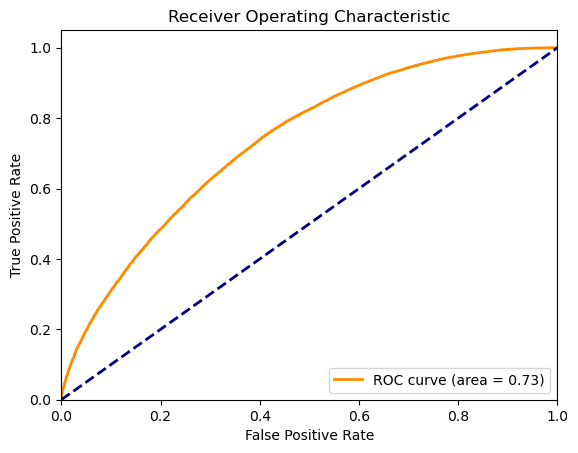

In [771]:
#with dummies (no insurance)
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [772]:
#with dummies (no insurance)
# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Specificity: 0.7269873163380636
Sensitivity: 0.5896933240238466


In [915]:
# Extract the first 10 variable names
top_10_variables = importance_df.head(10)['Feature'].tolist()

# Display the first 10 variable names
print(top_10_variables)

['triage_acuity_median', 'disposition_ADMITTED', 'eci_score', 'arrival_transport_UNKNOWN', 'arrival_transport_AMBULANCE', 'chiefcom_abdominal_pain', 'age', 'disposition_TRANSFER', 'chiefcom_chest_pain', 'disposition_HOME']


In [913]:
#with dummies (no insurance)
# Get feature importances
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
20,triage_acuity_median,0.267140
59,disposition_ADMITTED,0.121872
3,eci_score,0.092703
57,arrival_transport_UNKNOWN,0.075460
54,arrival_transport_AMBULANCE,0.073470
68,chiefcom_abdominal_pain,0.063101
0,age,0.054768
66,disposition_TRANSFER,0.040851
67,chiefcom_chest_pain,0.032632
62,disposition_HOME,0.028131


In [740]:
#with dummies
from sklearn.ensemble import GradientBoostingClassifier

#Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

#Evaluate Classifier
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.712795238543333
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75     47778
           1       0.68      0.64      0.66     37238

    accuracy                           0.71     85016
   macro avg       0.71      0.70      0.71     85016
weighted avg       0.71      0.71      0.71     85016

Confusion Matrix:
 [[36720 11058]
 [13359 23879]]


In [743]:
#with dummies
# Calculate AUC Score
auc_score = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

AUC Score: 0.7916325957586959


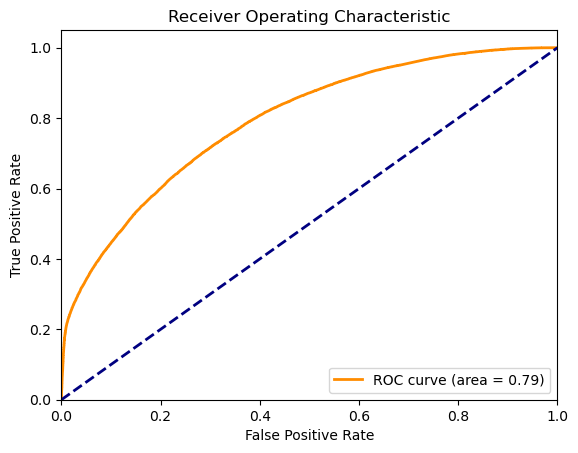

In [744]:
#with dummies
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [745]:
#with dummies
# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Specificity: 0.768554564862489
Sensitivity: 0.6412535581932435


In [ ]:
#variable = ['insurance_Unknown/NotInsured','disposition_ADMITTED','triage_acuity_median','chiefcom_abdominal_pain',
 #           'arrival_transport_UNKNOWN','eci_score','arrival_transport_AMBULANCE','age','triage_pain','med_event',
  #          'disposition_OTHER','chiefcom_chest_pain','disposition_HOME'
#]

In [747]:
#with dummies
# Get feature importances
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
70,insurance_Unknown/NotInsured,0.425630
59,disposition_ADMITTED,0.174078
20,triage_acuity_median,0.086317
72,chiefcom_abdominal_pain,0.052148
57,arrival_transport_UNKNOWN,0.046806
3,eci_score,0.033307
54,arrival_transport_AMBULANCE,0.030780
0,age,0.020283
19,triage_pain,0.017048
116,med_event,0.016460


In [259]:
#without dummies
from sklearn.ensemble import GradientBoostingClassifier

#Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

#Evaluate Classifier
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7116072268749412
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75     47778
           1       0.68      0.63      0.66     37238

    accuracy                           0.71     85016
   macro avg       0.71      0.70      0.70     85016
weighted avg       0.71      0.71      0.71     85016

Confusion Matrix:
 [[36912 10866]
 [13652 23586]]


In [260]:
#without dummies
# Calculate AUC Score
auc_score = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print("AUC Score:", auc_score)

AUC Score: 0.7901208105412771


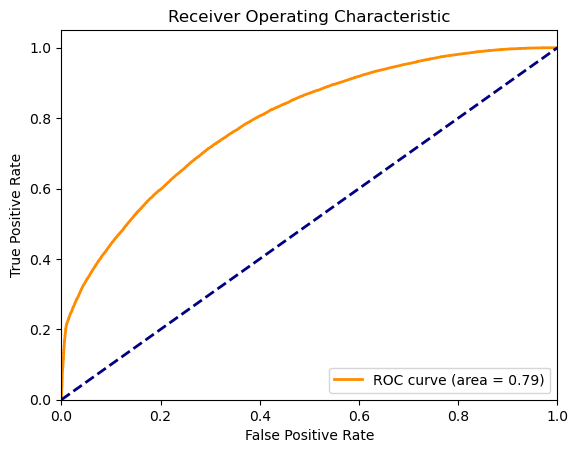

In [261]:
#without dummies
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [267]:
#without dummies
# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Specificity: 0.7725731508225543
Sensitivity: 0.6333852516246845


In [306]:
#without dummies
# Get feature importances
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': variable, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top n most important features
#n = 10  # Number of top features to display
importance_df

,Feature,Importance
5,insurance_encoded,0.429416
4,disposition_encoded,0.220529
24,triage_acuity_median,0.092065
3,arrival_transport_encoded,0.058742
26,chiefcom_abdominal_pain,0.052414
7,eci_score,0.034065
70,med_event,0.024569
0,age,0.020485
23,triage_pain,0.019501
25,chiefcom_chest_pain,0.014848


In [ ]:
#KNN

In [283]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the continuous features and encoded categorical features
continuous_features = ['age', "n_ed_30d", "n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
                        "n_hosp_365d", "n_icu_30d", "n_icu_90d", "n_icu_365d", 
            
                        "triage_temperature", "triage_heartrate", "triage_resprate", 
                        "triage_o2sat", "triage_sbp", "triage_dbp", "triage_pain", "triage_acuity_median",]
encoded_categorical_features = ["gender_encoded","race_encoded","arrival_transport_encoded","disposition_encoded",
            "insurance_encoded", 
             "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache",
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope", 
            "chiefcom_dizziness", 
            
            "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", 
            "cci_Pulmonary", "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", 
            "cci_DM2", "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", 
            "cci_Cancer2", "cci_HIV", 
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2", 
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss",
            "eci_Anemia", "eci_Alcohol", "eci_Drugs","eci_Psychoses", "eci_Depression",
            "med_event"]

In [285]:
# Normalize only the continuous features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

# Concatenate normalized continuous features with encoded categorical features
X_train_scaled_encoded = pd.concat([X_train_scaled[continuous_features], X_train[encoded_categorical_features]], axis=1)
X_test_scaled_encoded = pd.concat([X_test_scaled[continuous_features], X_test[encoded_categorical_features]], axis=1)

In [287]:
# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled_encoded, y_train)

# Evaluate Classifier
y_pred = knn_classifier.predict(X_test_scaled_encoded)

In [288]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_scaled_encoded)[:, 1])
print("AUC Score:", auc_score)

# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate F1 Score
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

Accuracy: 0.6586760139267902
AUC Score: 0.7058778942701658
Specificity: 0.74881744736071
Sensitivity: 0.5430205703850906
F1 Score:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71     47778
           1       0.63      0.54      0.58     37238

    accuracy                           0.66     85016
   macro avg       0.65      0.65      0.65     85016
weighted avg       0.66      0.66      0.65     85016



In [148]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_scaled_encoded)[:, 1])
print("AUC Score:", auc_score)

# Calculate Specificity and Sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate F1 Score
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

Accuracy: 0.6586760139267902
AUC Score: 0.7058778942701658
Specificity: 0.5430205703850906
Sensitivity: 0.74881744736071
F1 Score:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58     37238
           1       0.68      0.75      0.71     47778

    accuracy                           0.66     85016
   macro avg       0.65      0.65      0.65     85016
weighted avg       0.66      0.66      0.65     85016



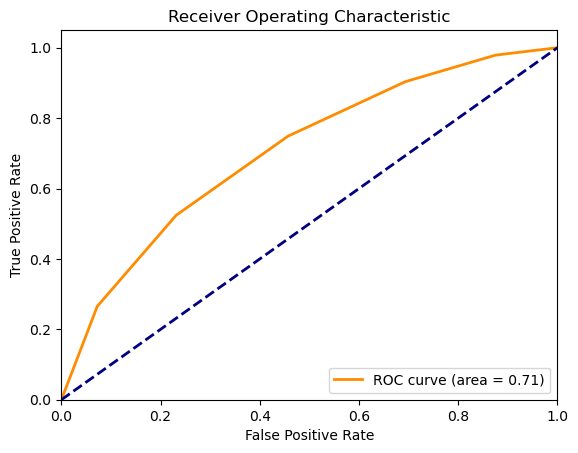

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the positive class
y_pred_prob = knn_classifier.predict_proba(X_test_scaled_encoded)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Calculate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, knn_classifier.predict_proba(X_test_scaled_encoded)[:, 1])


In [752]:
df_train.to_csv(os.path.join(path, 'train_dummies.csv'), index=False)
df_test.to_csv(os.path.join(path, 'test_dummies.csv'), index=False)

In [ ]:
#General Statistics 

In [804]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'data'
# Replace 'data' with the actual name of your DataFrame

# Define variables and outcome
categorical = [  'arrival_transport_UNKNOWN','arrival_transport_AMBULANCE',
               'chiefcom_abdominal_pain', 'disposition_TRANSFER', 
               'chiefcom_chest_pain', 'disposition_HOME','disposition_ADMITTED','med_event']

continuous= ['triage_acuity_median','age', 'eci_score']
    
outcome = "LOS_category"

# Calculate mean and standard deviation for continuous variables
mean_sd_continuous = df_master.groupby(outcome)[continuous].agg(['mean', 'std'])

# Calculate count and percentage for categorical variables
count_percentage_categorical = pd.DataFrame()
for var in categorical:
    count_percentage_categorical[var + '_count'] = df_master.groupby([outcome, var]).size()
    count_percentage_categorical[var + '_percentage'] = (df_master.groupby([outcome, var]).size() / df_master.groupby(outcome).size()) * 100

print("Mean and Standard Deviation for Continuous Variables:")
mean_sd_continuous
print("\nCount and Percentage for Categorical Variables:")
print(count_percentage_categorical)


Mean and Standard Deviation for Continuous Variables:
             triage_acuity_median                  age            eci_score  \
                             mean       std       mean        std      mean   
LOS_category                                                                  
long                     2.519132  0.610869  56.509329  19.933266  3.993048   
short                    2.718953  0.757302  50.011173  20.697344  2.439789   

                        
                   std  
LOS_category            
long          5.216529  
short         4.331902  

Count and Percentage for Categorical Variables:
                                        arrival_transport_UNKNOWN_count  \
LOS_category arrival_transport_UNKNOWN                                    
long         False                                               184911   
             True                                                  1658   
short        False                                               224819   
 

In [818]:
count_percentage_categorical.reset_index(level=1, inplace=True)


In [846]:
# Calculate count and percentage for categorical variables
count_percentage_categorical = pd.DataFrame()
for var in categorical:
    counts = df_master.groupby([outcome, var]).size().unstack()
    percentages = (counts.T / counts.sum(axis=1)).T * 100
    counts.columns = [var + '_count_short', var + '_count_long']
    percentages.columns = [var + '_percentage_short', var + '_percentage_long']
    count_percentage_categorical = pd.concat([count_percentage_categorical, counts, percentages], axis=1)

print("Count and Percentage for Categorical Variables:")
count_percentage_categorical


Count and Percentage for Categorical Variables:


,arrival_transport_UNKNOWN_count_short,arrival_transport_UNKNOWN_count_long,arrival_transport_UNKNOWN_percentage_short,arrival_transport_UNKNOWN_percentage_long,arrival_transport_AMBULANCE_count_short,arrival_transport_AMBULANCE_count_long,arrival_transport_AMBULANCE_percentage_short,arrival_transport_AMBULANCE_percentage_long,chiefcom_abdominal_pain_count_short,chiefcom_abdominal_pain_count_long,chiefcom_abdominal_pain_percentage_short,chiefcom_abdominal_pain_percentage_long,disposition_TRANSFER_count_short,disposition_TRANSFER_count_long,disposition_TRANSFER_percentage_short,disposition_TRANSFER_percentage_long,chiefcom_chest_pain_count_short,chiefcom_chest_pain_count_long,chiefcom_chest_pain_percentage_short,chiefcom_chest_pain_percentage_long,disposition_HOME_count_short,disposition_HOME_count_long,disposition_HOME_percentage_short,disposition_HOME_percentage_long,disposition_ADMITTED_count_short,disposition_ADMITTED_count_long,disposition_ADMITTED_percentage_short,disposition_ADMITTED_percentage_long,med_event_count_short,med_event_count_long,med_event_percentage_short,med_event_percentage_long
LOS_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
long,184911,1658,99.111321,0.888679,102978,83591,55.195665,44.804335,158129,28440,84.756310,15.243690,181044,5525,97.038629,2.961371,169576,16993,90.891842,9.108158,93415,93154,50.069947,49.930053,103127,83442,55.275528,44.724472,38507,148062,20.639549,79.360451
short,224819,13693,94.258989,5.741011,166353,72159,69.746176,30.253824,218753,19759,91.715721,8.284279,237012,1500,99.371101,0.628899,226301,12211,94.880341,5.119659,90039,148473,37.750302,62.249698,163944,74568,68.736164,31.263836,79381,159131,33.281764,66.718236


In [822]:
# Reset index completely
count_percentage_categorical.reset_index(inplace=True)

# Group by 'LOS_category' and calculate sum for counts
count_percentage_categorical = count_percentage_categorical.groupby('LOS_category').sum()

# Calculate percentages
count_percentage_categorical['arrival_transport_UNKNOWN_percentage'] = (count_percentage_categorical['arrival_transport_UNKNOWN_count'] / count_percentage_categorical['arrival_transport_UNKNOWN_count'].sum()) * 100
count_percentage_categorical['arrival_transport_AMBULANCE_percentage'] = (count_percentage_categorical['arrival_transport_AMBULANCE_count'] / count_percentage_categorical['arrival_transport_AMBULANCE_count'].sum()) * 100
count_percentage_categorical['chiefcom_abdominal_pain_percentage'] = (count_percentage_categorical['chiefcom_abdominal_pain_count'] / count_percentage_categorical['chiefcom_abdominal_pain_count'].sum()) * 100
count_percentage_categorical['disposition_TRANSFER_percentage'] = (count_percentage_categorical['disposition_TRANSFER_count'] / count_percentage_categorical['disposition_TRANSFER_count'].sum()) * 100
count_percentage_categorical['chiefcom_chest_pain_percentage'] = (count_percentage_categorical['chiefcom_chest_pain_count'] / count_percentage_categorical['chiefcom_chest_pain_count'].sum()) * 100
count_percentage_categorical['disposition_HOME_percentage'] = (count_percentage_categorical['disposition_HOME_count'] / count_percentage_categorical['disposition_HOME_count'].sum()) * 100
count_percentage_categorical['disposition_ADMITTED_percentage'] = (count_percentage_categorical['disposition_ADMITTED_count'] / count_percentage_categorical['disposition_ADMITTED_count'].sum()) * 100
count_percentage_categorical['med_event_percentage'] = (count_percentage_categorical['med_event_count'] / count_percentage_categorical['med_event_count'].sum()) * 100

In [886]:
 df_master['med_event']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
425082    1.0
425083    1.0
425084    1.0
425085    0.0
425086    0.0
Name: med_event, Length: 425081, dtype: float64

In [888]:
import pandas as pd

# Define the categorical variables
categorical_vars = ['arrival_transport_UNKNOWN', 'arrival_transport_AMBULANCE',
                    'chiefcom_abdominal_pain', 'disposition_TRANSFER',
                    'chiefcom_chest_pain', 'disposition_HOME', 'disposition_ADMITTED', 'med_event']

# Replace True with 1 and False with 0 for the categorical variables
df_master[categorical_vars] = df_master[categorical_vars].replace({True: 1, False: 0})

# Now, the boolean values in the specified columns have been replaced with 1s and 0s


In [894]:
# List of categorical variables
categorical_vars =  [  'arrival_transport_UNKNOWN','arrival_transport_AMBULANCE',
               'chiefcom_abdominal_pain', 'disposition_TRANSFER', 
               'chiefcom_chest_pain', 'disposition_HOME','disposition_ADMITTED','med_event']


# Calculate counts and percentages for each categorical variable
for variable in categorical_vars:
    # Calculate total counts
    total_counts = df_master[variable].count()

    # Calculate counts for ED Revisit cases
    hospitalization_counts = df_master[df_master['LOS_category_encoded'] == 1][variable].value_counts()
    hospitalization_percentage = hospitalization_counts / hospitalization_counts.sum() * 100


    # Calculate counts for No ED Revisit cases
    no_hospitalization_counts = df_master[df_master['LOS_category_encoded'] == 0][variable].value_counts()
    no_hospitalization_counts_percentage = no_hospitalization_counts / no_hospitalization_counts.sum() * 100

    # Display the results
    print(f"Counts and Percentages for {variable} in Hospitalization Cases:")
    print(f"Total Counts: {total_counts}")
    
    # Format Hospitalization Counts and Percentages
    print("Long stay Counts:")
    print(hospitalization_counts)
    print("Long stay Percentages:")
    print(hospitalization_percentage.apply(lambda x: f"{x:.2f}%"))
    
    # Format No ED Revisit Counts and Percentages
    print("Short stay Counts:")
    print(no_hospitalization_counts)
    print("Short stay Percentages:")
    print(no_hospitalization_counts_percentage.apply(lambda x: f"{x:.2f}%"))


Counts and Percentages for arrival_transport_UNKNOWN in Hospitalization Cases:
Total Counts: 425081
Long stay Counts:
arrival_transport_UNKNOWN
0    184911
1      1658
Name: count, dtype: int64
Long stay Percentages:
arrival_transport_UNKNOWN
0    99.11%
1     0.89%
Name: count, dtype: object
Short stay Counts:
arrival_transport_UNKNOWN
0    224819
1     13693
Name: count, dtype: int64
Short stay Percentages:
arrival_transport_UNKNOWN
0    94.26%
1     5.74%
Name: count, dtype: object
Counts and Percentages for arrival_transport_AMBULANCE in Hospitalization Cases:
Total Counts: 425081
Long stay Counts:
arrival_transport_AMBULANCE
0    102978
1     83591
Name: count, dtype: int64
Long stay Percentages:
arrival_transport_AMBULANCE
0    55.20%
1    44.80%
Name: count, dtype: object
Short stay Counts:
arrival_transport_AMBULANCE
0    166353
1     72159
Name: count, dtype: int64
Short stay Percentages:
arrival_transport_AMBULANCE
0    69.75%
1    30.25%
Name: count, dtype: object
Counts and